<a href="https://colab.research.google.com/github/adarshnitt/Deep-Learning/blob/main/covid_prediction_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
# use occlusion senstuvity
# use imagenet weights for my self made deep model
# merge all models in 1 model: resnet+mobilenet+inception+other
# try lstm and other deep learning models for classification.

In [2]:
import urllib.request  # URL Library
from PIL import Image
import matplotlib.pyplot as plt
  
def description(path):
    """
    show image of given model structure.
    (Image source is google)
    
    """
    urllib.request.urlretrieve(path,"gfg.png")
    img = Image.open("gfg.png")
    plt.subplots(1,1,figsize=(10,10))
    plt.imshow(img)
    pass

# Data importing from Kaggle
Competition Name:"COVID-19 Chest x-ray challenge
CSC532 Machine Learning class Hackathon 2021"

In [3]:
# we will use data from Kaggle, so fist match colab and Kaggle
! pip install -q kaggle  # q : quit no verbose

In [4]:
# downloading token from kaggle and saving in local computer then importing at new dir (~/.kaggle)
# path for token: Kaggle=>Account=>API_Token
from google.colab import files
files.upload()
# data will go to content section firstly

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adarshnitt","key":"2d1a2bbc0647fdafb5abc190fc1570e3"}'}

In [5]:
# imported data from kaggle to g-cloud in directory ~/.kaggle
! mkdir ~/.kaggle  # ~ home dir

In [6]:
# moving file kaggle.json to our new dir(~/.kagle)
# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
! cp kaggle.json ~/.kaggle/

In [7]:
# securing our kaggle api 
! chmod 600 ~/.kaggle/kaggle.json
#  chmos to 600 means only owner can read and write access of directory ~/.kaggle/kaggale.json.

In [8]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle competitions download -c csc532                   # data file will import in zip format

     |████████████████████████████████| 58 kB 4.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=da21a19c2a9ac8cf1259d4a02a1484a9b6125ce16076baa6cd9cf55afc59e17c
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
 98% 433M/441M [00:03<00:00, 137MB/s]
100% 441M/441M [00:03<00:00, 132MB/s]


In [9]:
! mkdir /content/covid_data  # making directory for unzipping data

In [10]:
!unzip  "/content/csc532.zip" -d "/content/covid_data/" #-d creates the directory and extracted files are stored there.

Archive:  /content/csc532.zip
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (10).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (100).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (101).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (102).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (103).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (104).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (105).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (106).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (107).jpg  
  inflating: /content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (108).jpg  
  inflating: /content/covid_data/DLAI3

<h1>File descriptions</h1>
<b>mini-dataset.zip</b> - the mini-hackathon training set containing two folders of normal/non-covid and covid<br>
<b>datasets.zip</b> - the training/test set containing two folders of training and test data with each folder containing sub-folders of negative/non-covid and positive/covid<br>
<b>sampleSubmission.csv</b> - a sample submission file in the correct format<br>
<b>DLAI3_Validation_Set.zip</b> - unlabelled set to be tested and submit in form of the sampleSubmission.csv which is two columns with first column as the filename and the second being "0" for non-covid and "1" for covid<br><br><br>



<u>
I will use dataset.zip for training purpose. mini-dataset.zip as validation task and DLAI3_Validation_Set.zip dataset as prediction to check our accuracy.
</u>

In [11]:
!mkdir /content/trial
!mkdir /content/trial/train
!mkdir /content/trial/train/positive
!mkdir /content/trial/train/negative
!mkdir /content/fake

In [12]:
train_path=r"/content/covid_data/datasets/datasets"
val_path=r"/content/covid_data/mini-dataset/dataset"
test_path=r"/content/covid_data/DLAI3_CXR_Validation_Set"


In [13]:
# merging train and test data into as train data because we have another data for test purpose. so i will use this both train and test for train only.



import shutil
import os
checkp=0
checkn=0


# need help: I m not able merge all train and test data into single one.
for cat1 in os.listdir(train_path):
  for cat2 in os.listdir(os.path.join(train_path,cat1)):
    if cat2=="positive":
      for data in os.listdir(os.path.join(train_path,cat1,cat2)):
        shutil.copy(os.path.join(train_path,cat1,cat2,data),"/content/trial/train/positive")
        checkp+=1
    else:
      for data in os.listdir(os.path.join(train_path,cat1,cat2)):
        shutil.copy(os.path.join(train_path,cat1,cat2,data),"/content/trial/train/negative") 
        checkn+=1
checkn  

841

In [14]:
trial="/content/trial"
for cat1 in os.listdir(trial):
  for cat2 in os.listdir(os.path.join(trial,cat1)):
    #for cat3 in os.listdir(os.path.join(train_path,cat1,cat2)):
    print(len(os.listdir(os.path.join(trial,cat1,cat2))),"------",os.path.join(trial,cat1,cat2))

592 ------ /content/trial/train/negative
165 ------ /content/trial/train/positive


In [15]:
# description data
# Train Data
import os 
for cat1 in os.listdir(train_path):
  for cat2 in os.listdir(os.path.join(train_path,cat1)):
    print(len(os.listdir(os.path.join(train_path,cat1,cat2))),"------",os.path.join(train_path,cat1,cat2),"_old")
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------
# our main train data
trial="/content/trial"
for cat1 in os.listdir(trial):
  for cat2 in os.listdir(os.path.join(trial,cat1)):
    #for cat3 in os.listdir(os.path.join(train_path,cat1,cat2)):
    print(len(os.listdir(os.path.join(trial,cat1,cat2))),"------",os.path.join(trial,cat1,cat2))

#len(os.listdir(os.path.join(train_path,"train","positive")))

290 ------ /content/covid_data/datasets/datasets/test/negative _old
118 ------ /content/covid_data/datasets/datasets/test/positive _old
551 ------ /content/covid_data/datasets/datasets/train/negative _old
125 ------ /content/covid_data/datasets/datasets/train/positive _old
592 ------ /content/trial/train/negative
165 ------ /content/trial/train/positive


In [16]:
import cv2
import numpy as np
def convert(path):
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img2 = np.zeros_like(img)
  img2[:,:,0] = gray
  img2[:,:,1] = gray
  img2[:,:,2] = gray
  return img2


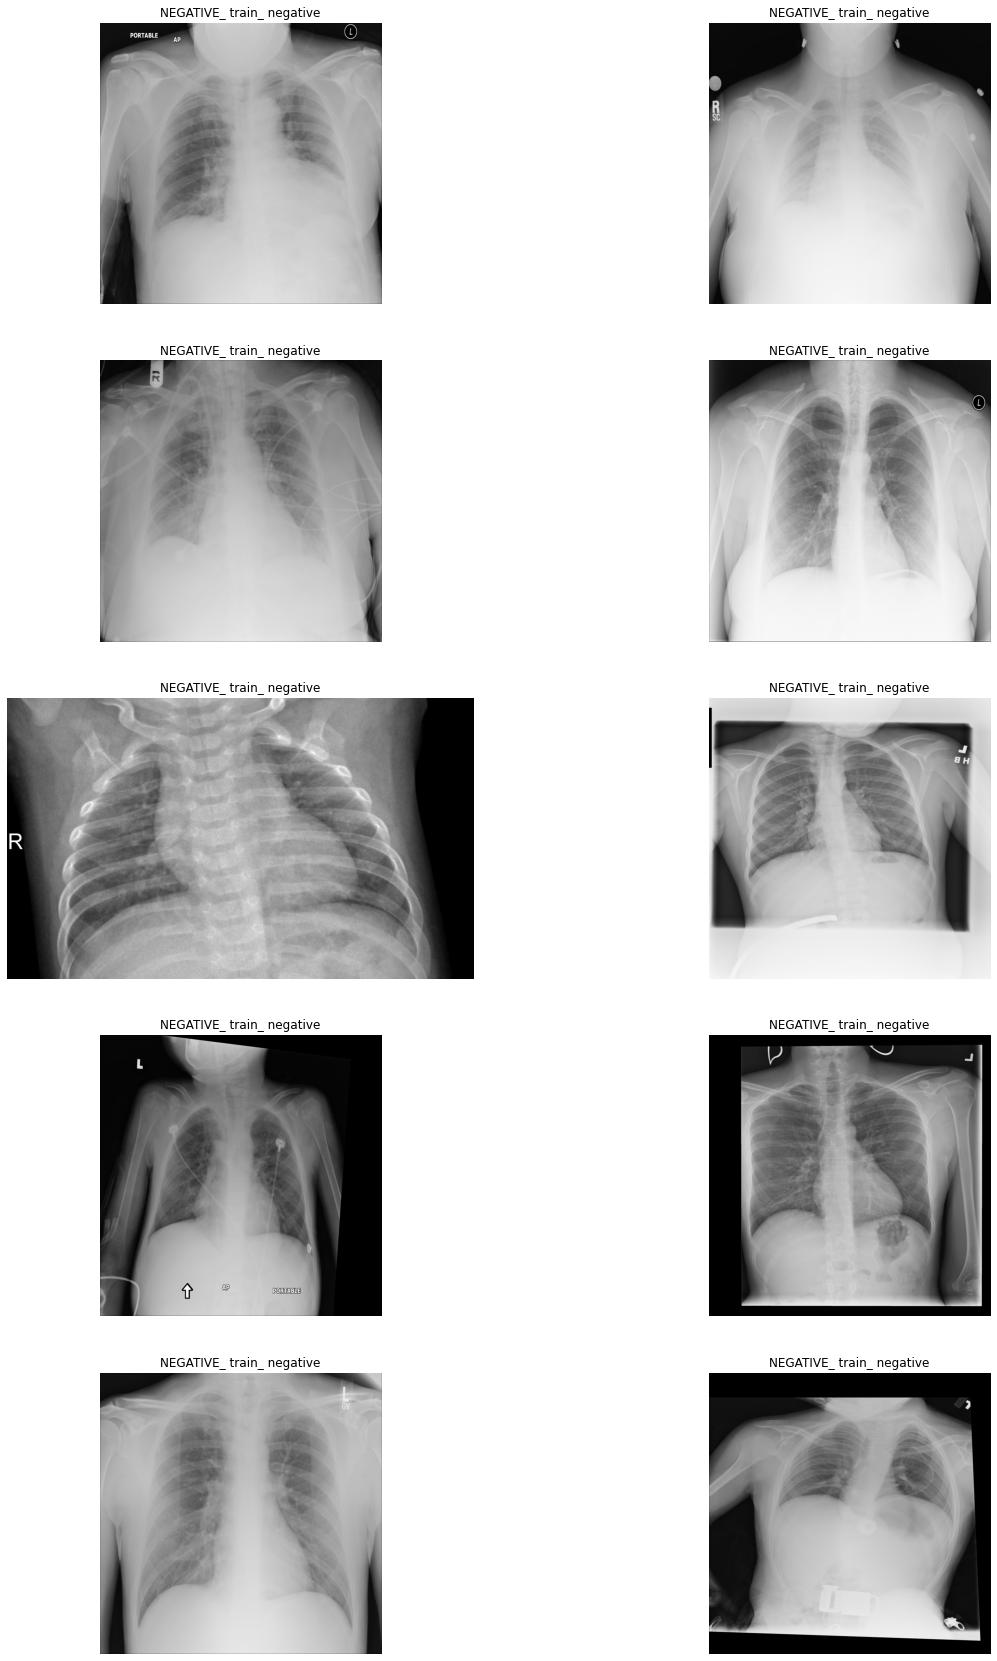

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
main="/content/trial/train/negative"
def show(main,a,b):
  count=-1
  plt.subplots(5,2,figsize=(20,30))
  
  for i in os.listdir(main):
    n=os.path.join(main,i)
    count+=1
    if count>=10:
      break

    plt.subplot(5,2,count+1)
    im=convert(n)
    plt.imshow(im)
    plt.axis("off")
    plt.title(main[main.rindex("/")+1:].upper()+"_ "+a+"_ "+b)
  pass
show(main,"train","negative")

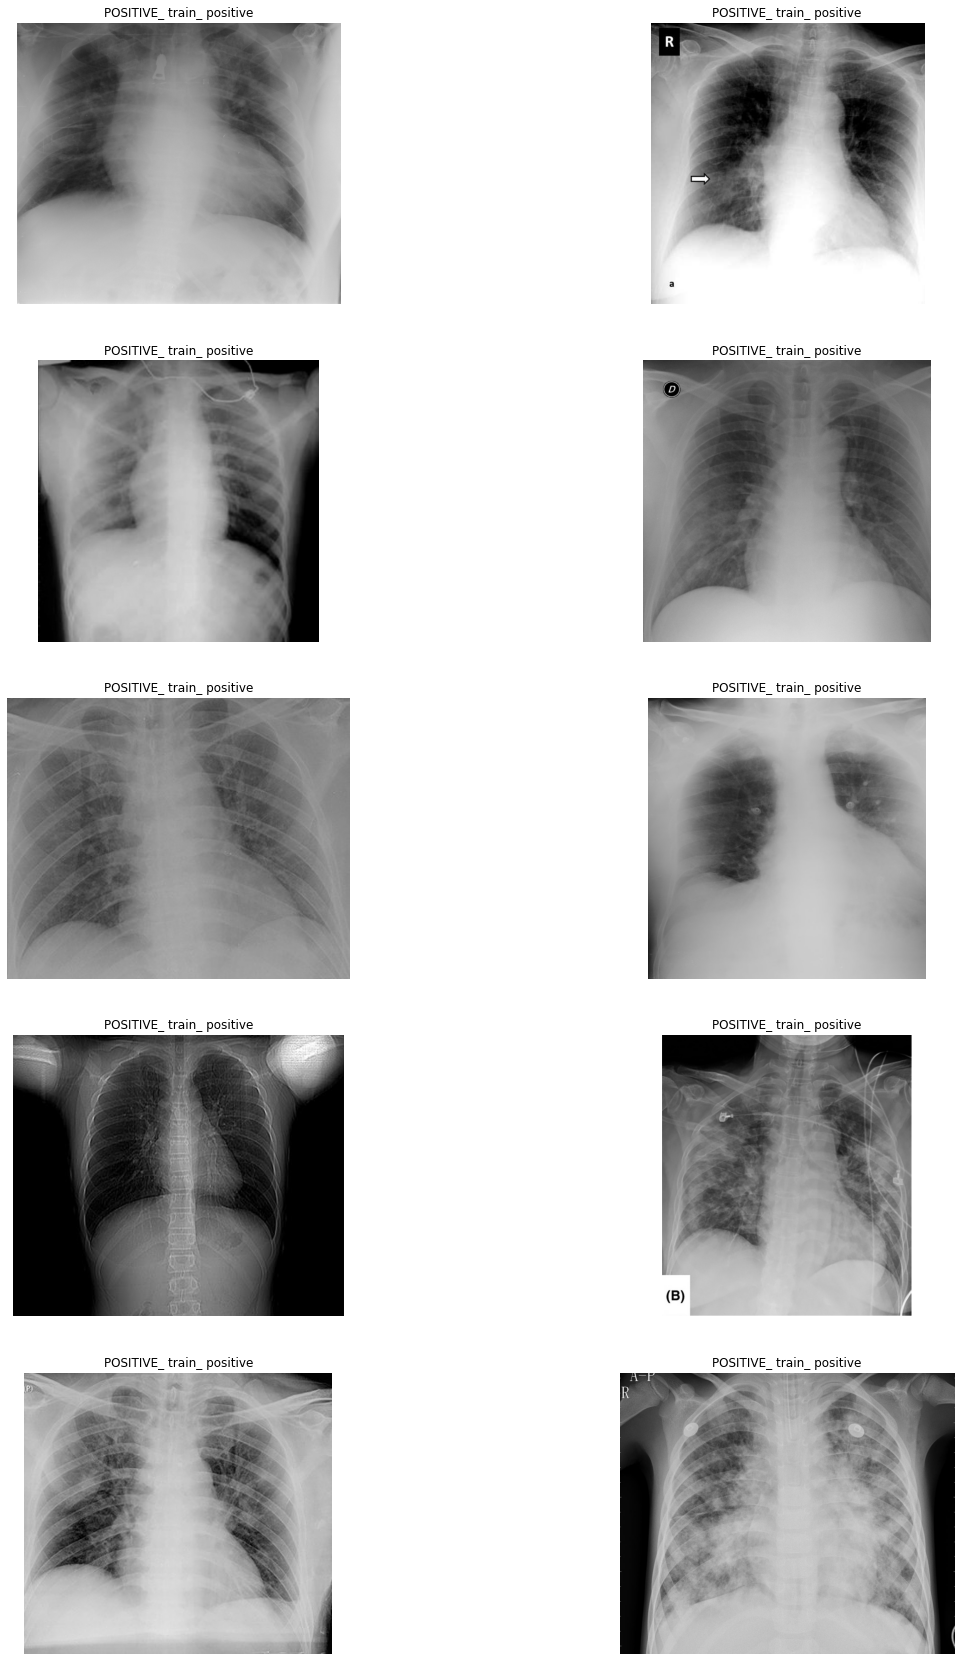

In [18]:
path=r"/content/trial/train/positive"
show(path,"train","positive")

In [19]:
# Val Data
for cat1 in os.listdir(val_path):
  print(len(os.listdir(os.path.join(val_path,cat1))),"------",os.path.join("val_path",cat1))

25 ------ val_path/covid
25 ------ val_path/normal


Text(0.5, 1.0, 'Validation data')

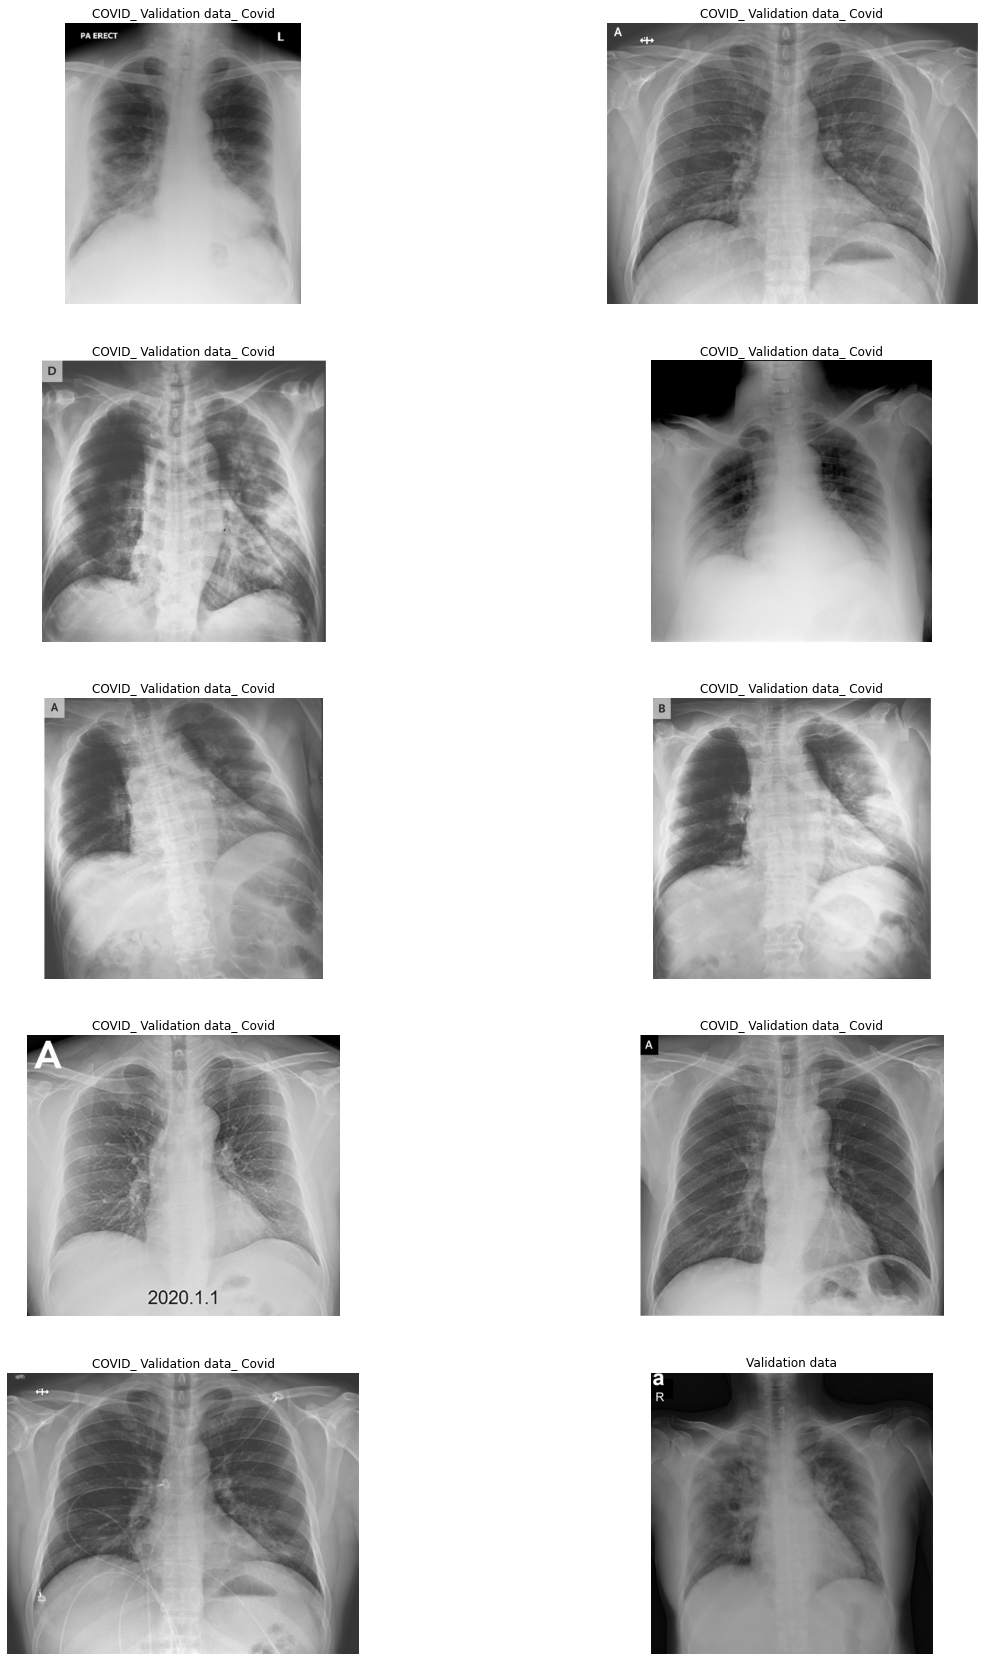

In [20]:
path=r"/content/covid_data/mini-dataset/dataset/covid"
show(path,"Validation data","Covid")
plt.title("Validation data") # covid_validation

Text(0.5, 1.0, 'Validation data')

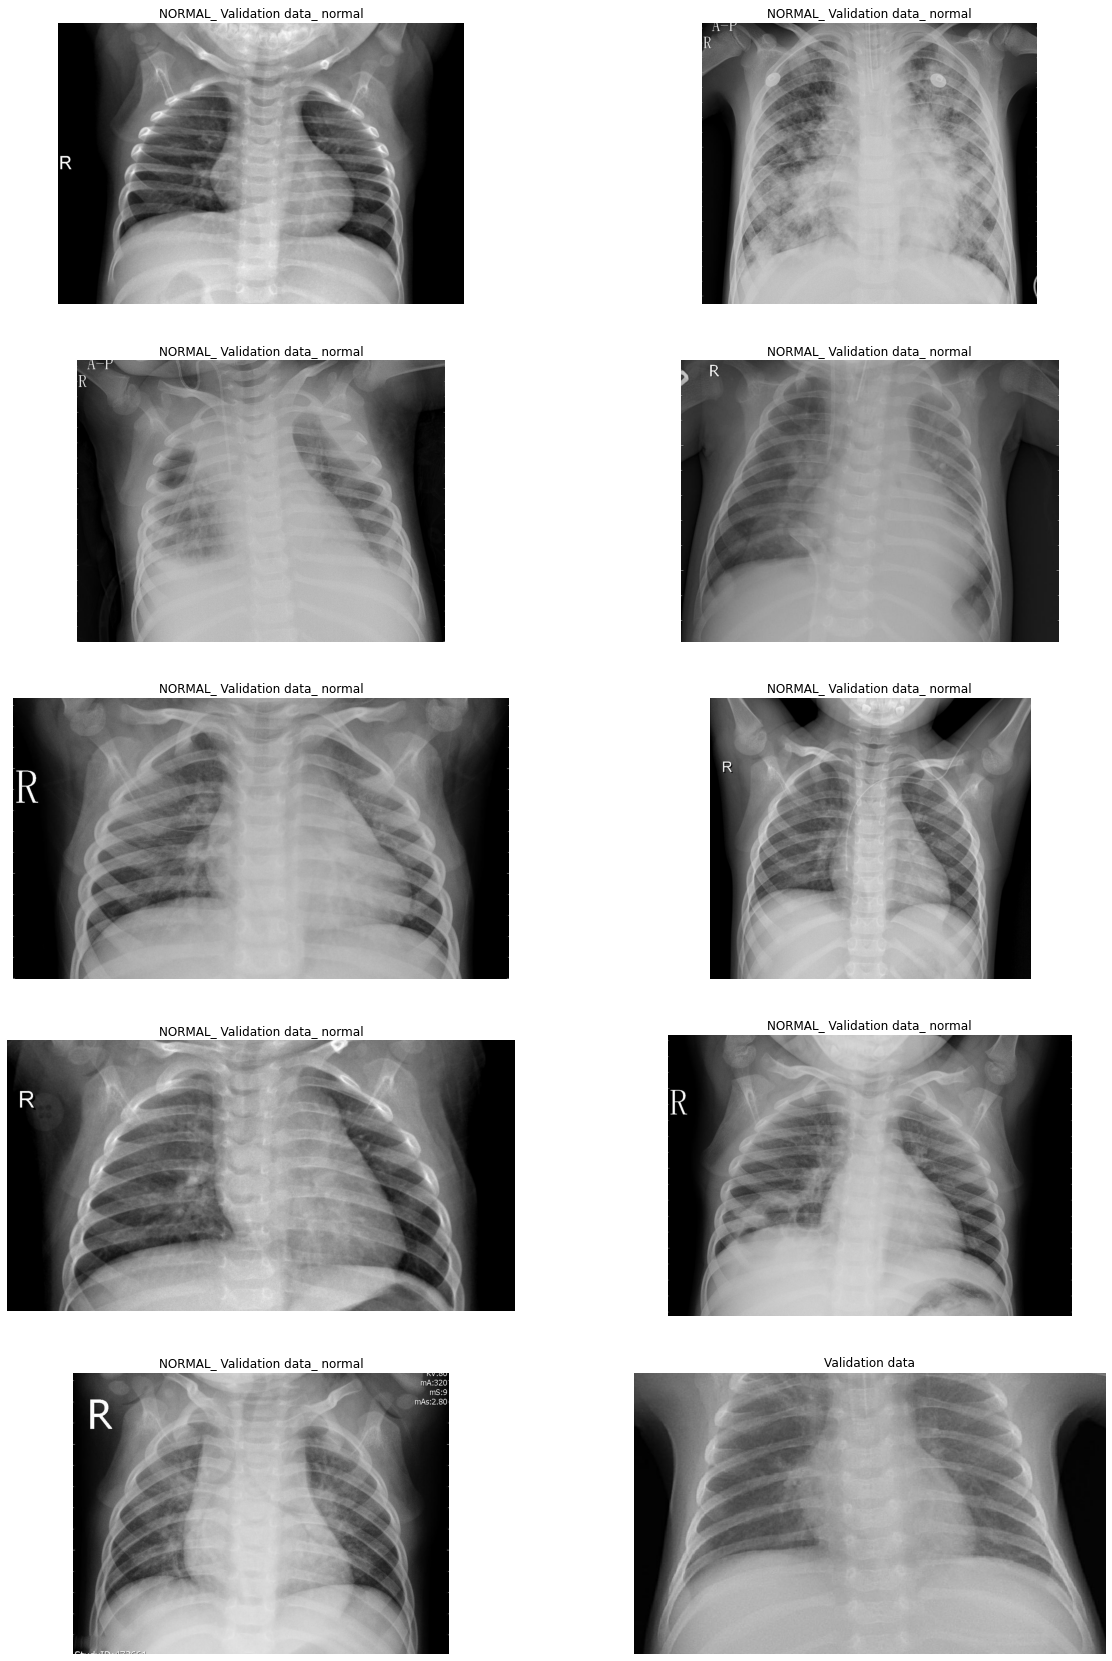

In [21]:
path=r"/content/covid_data/mini-dataset/dataset/normal"
show(path,"Validation data","normal")
plt.title("Validation data") # normal_validation

In [22]:
# Test Data
print(len(os.listdir(os.path.join(test_path))),"------",os.path.join("test_path"))

250 ------ test_path


In [23]:
# making a directory for test.
# 1 sub fi=older for covid+ and secondary folder for covid-.
! mkdir  /content/testing
! mkdir /content/testing/covid_p
! mkdir /content/testing/covid_n


In [24]:
y_real=pd.read_csv(r"/content/covid_data/sampleSubmission.csv")
y_real_val=np.array(y_real.iloc[:,-1])
y_real_val


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

In [25]:
len(os.listdir(test_path))==len(y_real_val)

True

In [26]:
count=0
data=list(os.listdir(test_path))
for i in range(len(y_real_val)):
  if y_real_val[i]==0:
    shutil.copy(os.path.join(test_path,data[i]),"/content/testing/covid_n")
    #print(os.path.join(test_path,data[i]))
  else:
    shutil.copy(os.path.join(test_path,data[i]),"/content/testing/covid_p")

In [27]:
len(os.listdir("/content/testing/covid_p"))==len(os.listdir("/content/testing/covid_n"))==125 # total images for test set is 250

True

# preprocessing

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # for image augmentation

In [29]:
def augment_train(path):
    """
    input: path of data
    return augmented image in batches=20
    """
    model=ImageDataGenerator(rotation_range=360,
                           shear_range=10, # angular ration float
                           zoom_range=0.3, # % zoom augmentation
                           rescale=1/255,  # rescaling (0-1)
                           horizontal_flip=True,
                           vertical_flip=True)
  # generating batches of augmenting data
    image_aug=model.flow_from_directory(path,
                                  target_size=(224,224), # output augmented image shape 
                                  class_mode="binary",
                                  batch_size=20)
    return image_aug

In [30]:
def augment_val(path):
    " for validation data"
    model=ImageDataGenerator(rescale=1/255)  # new pixel scale is 0-1
    img=model.flow_from_directory(directory=path,
                                target_size=(224,224),
                                batch_size=20,
                                class_mode="binary")
    return img

In [31]:
data_train_augment=augment_train("/content/trial/train")

Found 757 images belonging to 2 classes.


In [32]:
data_train_augment.class_indices

{'negative': 0, 'positive': 1}

In [33]:
data_val_augment=augment_val("/content/covid_data/mini-dataset/dataset")

Found 50 images belonging to 2 classes.


In [34]:
data_val_augment.class_indices

{'covid': 0, 'normal': 1}

# my model

In [35]:
import keras
import tensorflow
from keras import Sequential
from keras.layers import Conv2D,Dropout,Flatten,Dense,Dropout,MaxPool2D

In [36]:
# Regularization: used to calibrate loss, and avoid model for overfitting/underfitting.

model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),
                 input_shape=(224,224,3),
                activation="relu", # 0/1  # purpose of relu is to avoid dead neurons.
                padding="same"#  same size image must retain.
                ))
model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01), #Regularizer to apply a penalty on the layer's kernel
                 bias_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                 activity_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                 activation="relu"))
model.add(Dropout(0.2))

"""
model.add(MaxPool2D(pool_size=(2,2))) # overfitting avoid use maxpol
model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation="relu"))
model.add(Dropout(0.2))

model.add(MaxPool2D(pool_size=(2,2))) # overfitting avoid use maxpol
model.add(Conv2D(filters=128,
                 kernel_size=(2,2),
                 activation="relu"))



model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation="relu"))
"""
model.add(Dropout(0.2))

model.add(MaxPool2D(pool_size=(2,2))) # overfitting avoid use maxpo
model.add(Conv2D(filters=64,kernel_size=(3,3),kernel_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                  bias_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                 activity_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                 activation="relu"))
"""
model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation="relu"))
                 """
model.add(Dropout(0.2))
model.add(Conv2D(filters=16,
                 kernel_size=(2,2),
                 activation="relu"))

model.add(Flatten())
"""
model.add(Dense(units=64,kernel_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                activation="relu"))  # dense neural nn with 64 activation nodes relu for dead neurons
                """
model.add(Dropout(rate=0.3))
model.add(Dense(units=1,
                activation="sigmoid"))  # sigmoid give value between 0/1
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 222, 222, 64)      0         
                                                                 
 dropout_1 (Dropout)         (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      36928     
                                                        

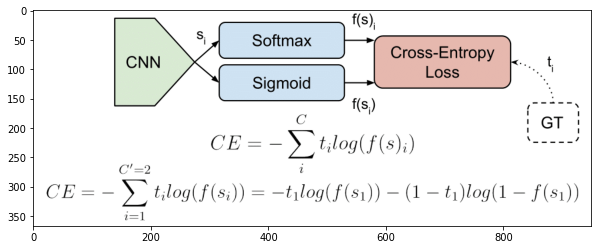

In [37]:
path=r"https://gombru.github.io/assets/cross_entropy_loss/intro.png"
description(path)

In [38]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(1e-5),
             loss=keras.losses.BinaryCrossentropy(),  #Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1.
              # binary ccross entropy use log loss function
            #Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events. 
            # categorical cross-entropy is for multi-class classification, 
            weighted_metrics=[tensorflow.keras.metrics.Precision(),tensorflow.keras.metrics.Recall()],
             #metrics=["accuracy","precision","recall"]
              metrics=["accuracy",tensorflow.keras.metrics.Precision(),tensorflow.keras.metrics.Recall()])

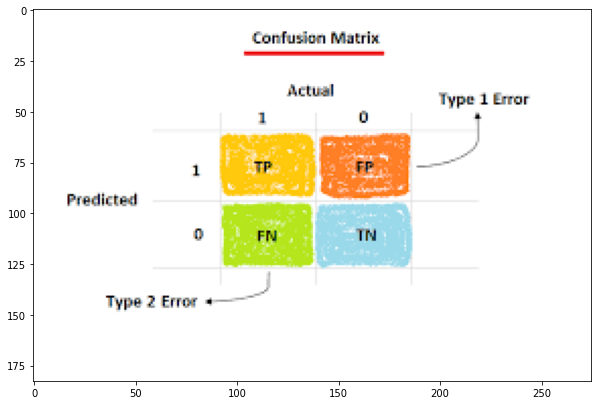

In [39]:
path=r"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAAC3CAMAAAAGjUrGAAACcFBMVEX///+15h2Z2er/yQ7/fyfr6+v/yADz8/P5+fnsAAD73t/uO0AAAAD/fSC05hX/xgD/exuj3Oy04u//dQD/1mn/eRSS1+ml3ez5+///gzLu7Ov/eA3/hjnI7G35////z0L/nGX/jEb/1F3/lFf/onHF62P/rYP/vJzg4OC45zC+6Uv/0lL/mmL/p3n/zLX/12zS7fXK7XUAAC0AABWpqanHx8f/3or/9fD/4pr/237/5af/sov/zjjr+PvH6fPC6lotAAAALWL//+0fAAAAAB7/6bb/78r/28rExMSrq6uampr/4tX/waT3/evT8I/1/OY/AAAAADEAAEJfFwDPpXwZYJUAAE0AU4z/9d//1cKGhobq1aXW4/Xj9rrb86Xw+9rd86yGz/OFipFlOwu2lmcQS3e9qJaru8/b+P324szMxrfr4NfN09qJrM0/Y4+Hp7ulhWEtSV91aUtmbHkxFQDQ5OBUKgqBj4iRZ0BlJwB8j3phPS6JgmYAJmNdcn9KVm2kgkpZeqRJfa5pmbqYb0qvysdEEgDAr4bdwZ4AD0W73v2GVyIyO0AHMl2jjWcBEBxKLylmQyGRusxjUzEYADHwUlZubWp2Xk7YybWCSQBlips9LgA6HSUtKzd+TB/FwKEvABFMRDsmIBoAKFO9pYs0GzWziwApKhzZtADMTADZbhW+fEVSZwD/5WHpp0wAMTr/6DbmhWHms4GtogoGHQ2kXDOtYxrmogDXuUbGXznRnIC0eVNEXgAAIBmnjzCvWxNGW2i1yBY5SQwAPhh5thueyb5VfwAUTABMRi9opqO70JdzcQsYVFpMSRSqv2KKdGsPvTxiAAAVMElEQVR4nO1diUMbV3p/gDTQdiSNJCQhJHSj+8IYhE6wMDIgDMTBiZA5vJjDmMtO7MTZbA6HJCaOvdmkrUOcJqkTd9Ok2abb3STd7HazTpPsbrut/6V+781oJAE24BBLsucHmnkz8yzP9+O73veeRggJECBAgAABAgQIECBAwG6xkJ0ayx+dOGLgWtMzhb1mp+IolJ0j7VrcJUWfvEc3eO8xT6+cmkNtbYbQ4sIiOrZvccGJ2hpCbfH1ORRqG0MLjW1x6PYUvYSm6WW00BYPDa+InU5nf+0iWhjb9v0rEdPLsDl95rGZIfrxs0sXW5fgBH3uiamVi8sZ+kk6cf6hxw5Aj6d+/Ch6+sfL84//5JmFrmfbup871Roffmn4Uqlv/wfB8xcQynQnMvTiPsOXq5NHDNMXUFfw9eeCIxemX0DPr764FGoFRXn4pZdPzVxcRrPZhwxvXcq0xuF3jb5Q6rv/YTDyShwtDF+abz13MH56NYU5SdJB8cUDN5YvHkWvLgEnBzEnitP00sXlkaPr+wxPXcrsawBOnr98xbD9f1CJ+Cn92twa3TqXYTmJz58987Nzr9NvXFxO/i39nOE8x4l8rTV4cTnVff0hwzTd+3cNmYNDoDFLpb57AQIElAn+ei9QaiH2FqG/2gvcX6TU/f3f7AFCpRZDgAABAgQIECBAgAABAgQI+KFRV1vqOygxrrLTfagtX5Vfe6RE91ImyLx5xYBC++fW6RVnHzo1hvr2x9cOlPquSosbieEx9PBKtq17ZX0fOr80O3f6woPOyau9r66mHoqjZNfJ+SPAycKb15cfcE4yrf0/OTJEjy00diXm6fiJpbeWppfXnrmbt+rfv78/uPHkwn48J3+qv3/ue9/qPcPsNRR689La9ecMNy6PnT6TnVu/fnV1fflu3qr3xSu9iw2osVbc6EQo5MRkrN9qxTS9da13sbHWCb+o0dmAxI3ivZWifDFyFD1/FA2/1P2Ht1cz/5B9B7ORIZy8e603fnrf1E/2Tb332mMzh7vOVJDWfD8AJ/MHTz1yuPvk2szFM/tffgPOzbOcPNs/dnoVvbiKTlxCLye6NpnYfQvgBL37s9Vk99jIzMWZxVN4CU8GT8mjd4EezMkSOrGU7Ar+4/25uGcrjDwK6R6dSHZdp+eST18+A5KvddOvgFK81fr+BeDk/Cpap+nVJP3gcIKx9oEhQz84prEj3FhCycfjpb4LAXuA0G6Tg0x26u7+8rV1d/XPfmBsIf6Npx/dTXfAUyunZ7ZcyrYdufv7t+lQEmxx13U4ZO68O0Kpgyfn922pKNtxcpkux0LMVnd9F5zgQeJOu+fRRtPZO/coCfaCExghrh24G9updfaVo0PZ4q7X3/zgtqONrYW8SO9L7KJ7wfW+bTqUBFvc9UJv2+Iuuu/y3YuvVwon97B7XVly0ri77vcDJ7XbQbxtjyI497a7eH8JOKnbDuK6uoaGhroGaOJXHdvGm4aN4LrfCYYiNGzXva62FJxsC7CdHk8KdYQymVQS0vpUTyYVSqZQKhRJdVg6wrJ2Y3tHQNZhifRk0CZjCKE6skWhQ/AKpUcPee3mAZNvwOYwmUz+8rSdbSEOx2SUzFNDtVMyWUc4LJPJ2mMymcUCZylADd4Y8VZmjISwkGmHwzHgGx1Nh9J+pc/hNw+Y/VFv1G+1+WxepYSRqBirVq8z21VKx3ZZanlyckxG1dTUgOgW/IrE6ikq4MFM4JM5xMiWojAnfq9OpVIxOp1SpNSKGJVKIhLpdDatVqJlJNDGIDsd/G7LSVnajoVIThiATTvoQwxeHgtwVM+RwnNDeYATO8gqYRgiuoRIT14AE3uS0erhFGO3MyLtdpzUlqWeeIzYPjwx0AIL/FooYweoiZGc5Zio53VGFgE90UlUVntUCdKbrIxXa5ZYzSIRo7fqRrXAjt7sMNkkVkakA4a25eT2yWEpcQxsBYtPecLEPAIUsSWqQD/w3mMkrQ6sJzZfKGT260HkUbMPmYnB2BxeW9SP9cRrBjMaMOmiVgkT3Y6TchwBIgQK0UEIsHQQfbDwTMSMsRjvUTyyDiNVI0uJkUMFeqIU+bChWBlGiRnRWxmTVcuoOIMSSbwqm9IuESm34aS37d4IuUuAocgsbIDpqSdBhmMh0MNyQrFO2JKSsXriUGEPAj4DwJj0DKHBxrvXnJPVmswiifXOnDjLsqKEUJii2gP1Ro+xnaqxhCOBsIc1GyMlIz6WiqBwTc6aaijsT3jJwZcyUTMjsUm0tnzIyTWgZbojJ71lSgmqj1EdwAuhgqoJeMIBLL+RCss6OBvKwDVOe6ieQk4kXpCb0ZkgCnkZiZWEH6VJZWVJkZi0ukN3ytn6e++ZkLtEGDQhXEOEpiw1skA4E8PuFuzJw4Zn/EvVcyEbOIEQy6uCyqYy2x1Kr1UPOZpSImG8/qhVy2uM6g45W1u2fGfJgQ/QA0+MONj2SCASAUWpaQeHC0zkUhQ+HIPtRBkRGAsxHbPPZLPrB+xphGx+a8hksnnhHf1snoJxWx/rzJatkgACMSqSYZMR8KPACniPsLGdDcx8ikJBwmKEHCYsRl4JpyeMw2Y221Qqb1Rptdtt2kNWPaOyWR11IiuXyTG+rTnpLV+zIYCsNZzTBkvAIovkKKjh81jcgkMjdPWIkY23HS34UWDBpIVYbPL57OSKRJkm4VnrvY3tLGb7nfdezF0B8pNILieJySyB8D+10u//vPXDZ/45H5bZoBOjYh7ZAhrVQeiV4Kji1Wu1ZofV/hHd/bSK7rryMZucKEmcxvalcxT7jDpnX7ZMjSbU1pA/gJjTkZPcWJ/ypH7xL5/84l8//be3PvFAPM4rClzFg6EUGlVCuGFMZhx09T6z3uf76E+26C9fs372OhBhIn6GC8XmAZ4TcVtff39/b7lqyPz1wpUMMjLYyalDwBiOff5s4N/pn9O/qglYOAWi2mPY3eAxQBhisR4UJeolPsMGQ2PfR7/+7Ktffvoi/TkYE4z72KCDDUk5Cpz0Z7PZ/v19beU5DZpD0VKHGFVQE6gJyCyWzz+hvjj4+/+A8bEszA13UkRPcAnhGB4D2hiv0k6Ci3JA72N+8+uvvvx432+/hPReYmbsbH7CwMhQueuJ55JhIycFSHXIOn77u/ov/nMyYumx9BD1ADUiUSjWTjgBMsB7+kg4lnh9ep/jNx+K9B/P+NN2q0jvF+nsfCi+c85WVsgUPg7KWMAJlQqHU6kvfkV98fue+h5jfXuM0yGSmrSHie3YVeAptDpJLoHXRW1fMV7zZyKbxKY1DWh1JlWuqKIbrRRO5t+kn8srSrhQTyhK1s4qDiRsMaowHsP4z8jajt7G2KIDTK6gZrbqrOBxfd4Bh1Jncvgc+ihEZ5LWKdOVwknIKXbmJ3eNRbZD1cSMsRpeN7jqGxeV4IJsHtV5VeBKVRLWx0p0h9JWsy2aTh+qG7XXDaR9ZrvequX0pHJspwjHivSkvsjj5k7xnFDtICQpFlitNjaflXjJWFgVNZv0Vp9OZWMYiT6X2leOjy1CqqAYXUwIl7MVJPgktyecqKyMRKvXWXN5voSxQtLig2NoiXySyuZkIUYKsURoC0cFN/oJeGRkuMwqD2XsgS0IqYRAG8XDHb9Dy4UYlQmnIyI2f/UNcO5XUqmciD0UhXKlAKwLEWPAiCuQxojR09MTIaUCWYRiGZOBkFjeNIjP6FSOKMnQGDtXsif8MHqTRGRmvFab0l+hnECcyYRq6rnqWj3lCVuMMSCqwxNJZTpkRH/CKRkus5AxYNoskfjSYCWMTaXU4QwfnItVomIkEqtOpZNERWYf5G525GUqJ+4UQ9wDMvekjMRI6iEz8+AZDUxEPRUIRHCeVt/Rg6twqR6WE7Ad8KQiiclsd0TNEhMkcKJRkd9u06f9jrQ/PeCAaG0N+c2VazvYLNg6NFdtIx6FIl7EQoqybOGaCmPWWE5IwLH5B7RRGCFrHaNRewi8i9/siNpFdqsO6w5WIaWjZJyEFlFvQ/Gptoatu26GOOmRsTzgVywGbtUjgyExni+WyWpYN8uFnRpZBs8Xs/MXIq3XbGZwS2VW6W1KswpyFrNKxHCxiFEpD+12ucr3wYnX6IIVZ/NHhrpJYjrLrz3s3vEafrjrdhjx1oPdWNoj4XBPjyUSyUQCAUtPpqe9wxiOtANlshpZPVAUYIVMe5W46MpIGCZffIUcRadSMrDRiWxKlcjmSO96Cc/3wXBi7QPnyq2Ts1dX0PzV7CvJbHz+1rV1+g9jC1enDKFbT3bthpNtkUSpjkgmlUrx3dNRrV5p1vpMJq9eqcM/OqXe4R9I2wb80TQKHUrv/N33CMMr55fX6bG1K/ETivOrNx5J0icfnjslfmIuczB4enUEX9vpW93t2q0QGk0jyOcdaHQ0NJr2+9N37P7DY/haH1qbQdOtl9+Ze+JS5pFk91DrGEo+kThGX35/9dUlNJzjRLwdnNv22HH3xsbcrpFgJ+++d8uohxUIrR1AYECzY68SPTk3vDI7dmJpnl48NTc9c2o3enIYbAONHz+M8A8yHJ6cGB8/3tTUPDHoaj4+Pjk5idDk+MTEOG7wf/gGGEUaDAZkQNiHGeL4IB43cLugQhEMBg33VE9ugUudX0HoVHYFLWTn+pNT8XlormfH5rNT8dDsyuyOPyYhnpjoHGyakEqrXO5ml9vtqpIC3FXNUhad+ILURdoTWEgsb0ITrJYnNNXVmmqNWiOXV6sT1dXVanV1tUKBd2p8oNHcU072EI0tRNyqqiqOhCoMaRW7Jy0p355EjUGQWKFWYAqqN0NReFIdrFBOaltyEm8GuSJ1u9g9sDNOOKnmCVFrtuAFQ6PRQA95hXIinmR1ZCtK3G6yb2qWYh1pwcbDcaIOahIKjSLBWotiMykJFIdr8V1GtTIB4UTqnuzkzKeAExd7rqmZcOICTpqQUw2OBBMBXkWjqJZXAzHEaLBFgdrI5RpOg+LAlKIyOakdzJMhbelsLlKUppyb4W0Ha4aG+A0N7MC7YvtRY4oUcWAJXG4w51MSFctJo6tANbD0Us6RSFlHK22CKOTmPO9xzIlio3PVBOUJtTx3JOdNCXSnXOf97gzCSZ4WMBGXCwdfCMZurB9SabMrZ1EQd4LgPHn3ockZylZuVh0EViqVE8hEmvho2wwkACeuwZbjnS04bWkGTnjCxpEChxoFF3fl1RqWGp4XTYG7haa6Um2HtY+i8NvUInVNdDZNtjQPugsugY8tUAlFUBHPExGXbxF+FJUZiw8Tp1HACjnudHe6sRtpGcyfHgTHgvJyg5oQz4J9LARmQDEfxP9W5mfwxdh/QtSdcOecBgk2oB7NLSSzz4fmqiJOWGIUQAd2MKA0BXTlL5davB3jPH2GHw/lcrZBPp8Ff+LCiRphIUcHe6WlmBNwsYpEULHy7FR25clVxbfXinxsAo8CSinmbgAj6vOruQMxYsWd4FXiJv3119IuWnrzv9zcsIdTF6k7xwmX0muCiYQhePKNWXpFfYK+9N4RrBqanK4Qb1xKOXeDkRfQ9Au5A/FhVt7BnOeQ3qQh9Lz9u29u/kU64eLY4NSlBWmIYSg4h8rm+dXfHvyR5u0/H/32FcKTOmc/uEulfPnMyFE0zX97kHgIC+ySDk5I2Vjsukl/913VWdfXN//ommiW8oy4cQkB8R6j0KUCJ9Vvq//052fwQZzlRE44kZdSzt1gjW57mVdq8RDIjXMULlWVttyk3/vvzrPS//nuj1xST7yvtPN4s7QzKa/eCDXHyY++/fQKRwZnXooKsh20ns1X/bGe4HyET+rBdgZbXN1VLvovHE2TrP3gnAVtKA4oFHJIV19qxZxo/vdAUdCpKNspgthA8hNQBjdEF6wzrm9cbvc3VS3/9w3HxSDnYfP5SWH0UW84w2uSGjxLxdhOEbhY3AycVI3D2AcisdQ17m6BMXJRIMY9Nsbi6g10ECQKL1QoJyTuSCdwjRFLD64FWu5xsBRpnpAqktdxnOBaCS+4ZmOpLXdJI49XrJ5MkJoSn7G5wFKkzZ3Yv7hJeZqktlzxwIVYoXEVxbCFymxip3I5waOdXHaC1cTdROzGzVcR+JrKJBtica21kBI2MG9QmQr2J4NSdsiLhz0sM66qJjwaznsUdhiEHfEkllPD20eCeFRIVhLViUShf+WdS0XGHVy3l7YQPYHRcAvZDVa14OEPa0I8KTiJGQROFHnJcZ1ao1DDBhcMNIpETlPkXJ+tnxRT7hCPS3FNnvUYLRO5yit+NbkKrQr7FqInmk3FR6wgcvmmCFRdqbVH1sc25bLYAmNp5uyFL6EATbgeq0abk9lCcjhqNNiYKpiTgoJsASlsjbq5Oe9WpMfFIHGQM5GtJrw0avyDK5S4pJSozNojth2ehKLpHU55pFK+si+VHhar+dEwaysQcjS5SR2SueCZHy4qqYMVyskkO4EDknc2QV7WiefLXdzUMfltcrm4ZtUQNw8ITiWIadAo5Ao1aEU1aA6ck6sxOwo4RZJZtaZC50Yb0WTL5NCg1D00jgyGyfHJcbIZH5qYHDo8BK2mQfcEDHla4AjhElRCrdYE42SlhcEQN6BgkF1kEVdAEyFoG4JBhSIh1yTKdF3BThfZNO5kQQ7p3nguUdSbW4nDLsVh34lrNt7TNTl7iNI+d6s8cZu7rr3NEyceZE6ct3mAzQPNyW0+BixwsuPuu3z3Msdt7rpN8Ceb8EBzcpsE4Xac7DKfKMv0426xWJ5Pfyop+u+rv/CeICuoSTHE+7OClhRC3NffV5nRYjOGabp144z1+ll6BXaj9PsHT271bzagTtzbn71vCMEYOYpm59DsYnb28TGEPwAGySgaORJHaO0KQpmpWy9N3UqsX50yzPY/TmYYavOPjBM72/r2l/FjbO4WwMnaM8nuc11z08vrV+InLuGT5/F3ka3THy5n6Ll5em79YPD86vQHWBXq+mm6t7cPP9EHP8XGKS7rx9jcJYCT5Nn+mWT3ybUrN1ovv4O/K+vGFfz5Uawn80fQ/CP4e5JGjk6TdVu1wImzPEs6ewf8vVCn6aVk18qLF47hD4ABJfTiIpjJ2kPnFhdeIbS0njuxlFujVFeW38uwp1gHDzK6L57s6p+Kkw+A4Y+BZafAuaaz2axzClwKuxpn/YH5mjmCkRmUFL4rqxgLYDDOHX8EXYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE3B7/D+uJt+d+d05eAAAAAElFTkSuQmCC"
description(path)

In [40]:
# early stopping and model check point  to save our resources use limitly.
from keras.callbacks import ModelCheckpoint,EarlyStopping
#earlystopping : when model performance stopped improving
es=EarlyStopping(monitor="val_accuracy",  # quantity monitor if not changing with min_delta upto patience no then early stop, dont waste computationl resources.
                 min_delta=0.001,
                 patience=15,
                 verbose=1,
                 restore_best_weights=True # best  waits till point will be in record
                 )
# model saving : making checkpoints by saving tunable weights
# saving best trained model till point
mc=ModelCheckpoint(filepath="/content/covid.h5", # used to store huge amount of numerical data in binary format, here store model metadata in.h5 format.
                   monitor="val_accuracy",
                   save_best_only=True,
                   save_weights_only=False)
tune=[es,mc]

In [41]:
# epoch: no of times learning algo will run with traing dataset to train model. over the entire x and y data provided
# If x is a dataset, generator, or keras.utils.Sequence instance, y should not be specified (since targets will be obtained from x).
# Batch-size:if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).
# steps_per_epoch: Total number of steps before declaring one epoch finished and starting the next epoch.
# 1 epoch ko complete karne se pahele kitne epoch usi dataset me algo train karu.

histry=model.fit(x=data_train_augment, #(input,targets) traing data things
                 validation_data=data_val_augment,
                           epochs=20,
                           steps_per_epoch=25, # total data set/ no of batch size
                           verbose=1,
                           callbacks=tune) 
# list of  callbacks functions applied during traing

Epoch 1/20
25/25 [==============================] - 36s 729ms/step - loss: 3251.1245 - accuracy: 0.7720 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2535.4678 - val_accuracy: 0.5000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
25/25 [==============================] - 17s 679ms/step - loss: 2881.1704 - accuracy: 0.7787 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2281.6755 - val_accuracy: 0.5000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
25/25 [==============================] - 16s 634ms/step - loss: 2610.5173 - accuracy: 0.7800 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2055.0618 - val_accuracy: 0.5000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.000

#<h1> What i did while 3 times traing to deep learning model </h1>
<b>First Attempt</b>- Trained with 18 layers Deep NN model. Model was overfitting because loss is decreasing with epochs but validation_loss is increasing as epochs moving. My  best accuracy was 78% with validation accuracy to 50%.<br>
<b>Solution</b>: I reduced deep model from 18 deep layers to  11 deep layers

<b>Second Attempt</b>: A I reduced deep layers to 11, I got val_accuracy of 50% and best accuracy was  0.7967807054519653. Again model was Overfitting.<br>
<b>Solution</b>: I tried Regularization.
<br>

<b>Third Attempt</b>: I applied LI and and L2 Regularization on deep layers: Best model, both validation loss  and  loss reduces. Accuracy was 0.8059999942779541


<b>Final Observation</b>: My validation acciuracy is stuck. Reason may be loss function is at local min. <br>
<b>Solution</b>: Increase dataset size. tune learning rate(smaller is best). too small / big is dangerous. Try Imagent pretrained weights for my own developed models. Shuffling data is also an option with different optimizers. Reduce model size for concerning Vnishing gradient(weights=0).

In [42]:
log=histry.history
log.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'val_precision', 'val_recall'])

Text(0, 0.5, 'loss_')

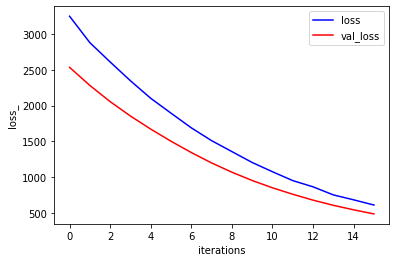

In [43]:
import matplotlib.pyplot as plt
plt.plot(log["loss"],"b")
plt.plot(log["val_loss"],"r")
plt.legend(["loss","val_loss"])
plt.xlabel("iterations")
plt.ylabel("loss_")

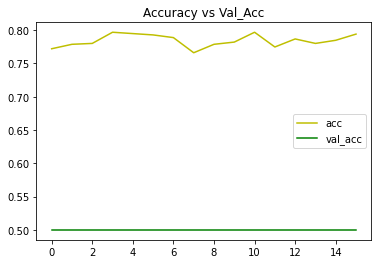

In [44]:
plt.plot(log["accuracy"],"y")
plt.plot(log["val_accuracy"],"g")   # model is still overfitting
plt.title("Accuracy vs Val_Acc")
plt.legend(["acc","val_acc"])

In [45]:
max(log["accuracy"])

0.7967807054519653

Text(0.5, 1.0, 'test data')

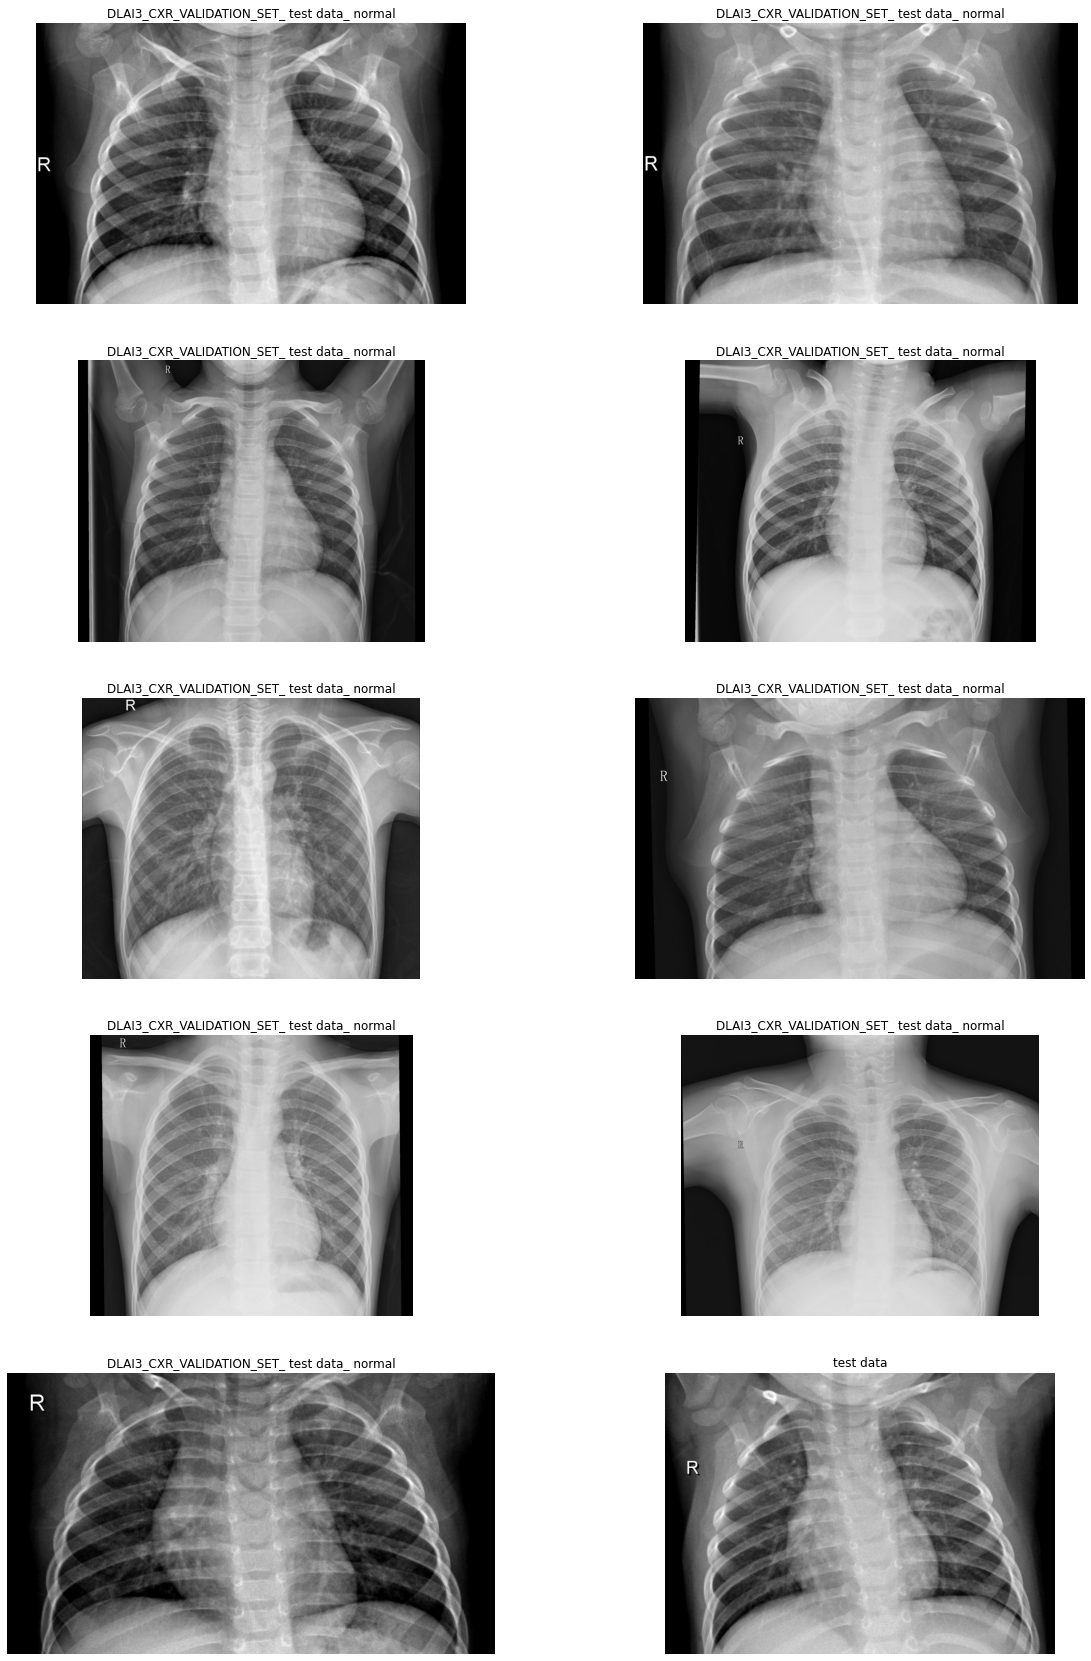

In [46]:
path=test_path
show(path,"test data","normal")
plt.title("test data") 
plt.title("test data")

In [47]:
trained_model=r"/content/covid.h5"
from keras.models import load_model
model=load_model(trained_model)

In [48]:
len(model.get_weights())

10

In [49]:
test_p=test_path
test_data=augment_val("/content/testing")
pred=model.evaluate_generator(test_data) # loss ,accuracy

Found 250 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
pred  # loss ,accuracy on test set

[2451.777587890625, 0.5, 0.0, 0.0, 0.0, 0.0]

In [51]:
test=augment_val(r"/content/testing")
prediction=model.predict(x=test, callbacks=tune)

Found 250 images belonging to 2 classes.


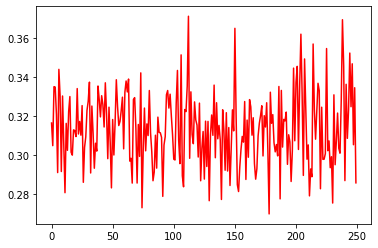

In [52]:
plt.plot(prediction,"r")

In [53]:
correct_prediction=pd.read_csv(r"/content/covid_data/sampleSubmission.csv")
correct_prediction

filename  label
0           DLAI3_Val_Set1 (1).jpg      1
1           DLAI3_Val_Set1 (2).jpg      0
2           DLAI3_Val_Set1 (3).jpg      1
3           DLAI3_Val_Set1 (4).jpg      0
4           DLAI3_Val_Set1 (5).jpg      1
..                             ...    ...
245  DLAI3_Validation_Set2(12).jpg      0
246  DLAI3_Validation_Set2(13).jpg      1
247  DLAI3_Validation_Set2(14).jpg      0
248  DLAI3_Validation_Set2(15).jpg      1
249  DLAI3_Validation_Set2(16).jpg      0

[250 rows x 2 columns]

In [54]:
# checking accuracy
"""
from sklearn.metrics import classification_report
result=classification_report(y_real_val,prediction)
print(result)
"""

'\nfrom sklearn.metrics import classification_report\nresult=classification_report(y_real_val,prediction)\nprint(result)\n'

In [55]:
"""
from sklearn.metrics import confusion_matrix
confusion_matrix(y_real_val,prediction)# ytrue, ypred
"""

'\nfrom sklearn.metrics import confusion_matrix\nconfusion_matrix(y_real_val,prediction)# ytrue, ypred\n'

#visual explanation algorithm: Grad-CAM. <br>

In [56]:
# some pre-requisite
import tensorflow as tf
#tf.keras.models.Model # used to merge layers for new model


tensorflow.GradientTape()  # ""Record operations""  for automatic differntiatio

x=tf.constant(10.0)
with tensorflow.GradientTape() as tape: # tape works as record
  tape.watch(x)
  y=x*x
 
  with tensorflow.GradientTape() as tape1:
    tape1.watch(x)
    dy_dx=tape.gradient(y,x)  # dy_dx=2x
  d2y_dx2=tape1.gradient(dy_dx,x) #d(dy_dx)_dx2=2


print(dy_dx)
print(d2y_dx2)


m=tf.constant([79,8,9]) 
mm=tf.argmax(m)  # index of max value in data
print(mm)


tf.reduce_mean(m)  # mean of given data

mi=tf.constant([[1,2],[21,3]])
mw=tf.squeeze(mi)              # remove dimension of size 1.


import tensorflow as tf
mi=tf.constant([[1,2],[21,3]])
#tf.reduce_max(mi) # find global maximum data.
tf.maximum(mi,0)  #Returns the max of x and y (i.e. x > y ? x : y) element-wise.here x is mi and y is 0.

tf.Tensor(20.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  2],
       [21,  3]], dtype=int32)>

In [57]:
def get_img_array(img_path):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=(224,224))  # return image format array. we need to again transform it in array format
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)  
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    print("shape of given image after pr-processing is-",array.shape)
    print("now adding 1 more dimention to input img array")
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    print(grads)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [58]:
# building occlusion senstivity
occlusion_image=r"/content/trial/train/negative/00001280_004.png"
occlusion_trial_img=get_img_array(occlusion_image);


shape of given image after pr-processing is- (224, 224, 3)
now adding 1 more dimention to input img array


In [60]:
path=r"/content/testing"
test_data_Transfer_learning=augment_val(path)

Found 250 images belonging to 2 classes.


# Transfer learning

In [61]:
# tutorial:https://towardsdatascience.com/an-intuitive-guide-to-deep-network-architectures-65fdc477db41
# Inception Vn: @going_wider. n reference version. Expand across width(many filters on same input). GoogleNet was iNcersion Version-1

# Xception: extreme inception,Expand across width(many filters on same input).
# VGGn=n:Layers depth.very deep convolution network.(same as deep CNN )

# ResNet:@going_deeper. very deep nets perform worse as you keep adding layers bcz of vanishing gradient.
#a “shortcut” connection adding the input of the block to its output to maintain grasient. 

# DenseNEt:for to solve Vanishing GRadient.(somehow same as Resnet.)
#A DenseNet consists of dense blocks. Each dense block consists of convolution layers. After a dense block a transition layer is added to proceed to next dense block
#Every layer in a dense block is directly connected to all its subsequent layers. Consequently, each layer receives the feature-maps of all preceding layer.
# https://theailearner.com/2018/12/09/densely-connected-convolutional-networks-densenet/#:~:text=ResNet%20passes%20information%20from%20one%20layer%20to%20another%20layer%20via%20identity%20connection.&text=DenseNet%20architecture%20explicitly%20differentiates%20between,and%20information%20that%20is%20preserved.

# MobileNet:reduce the number of parameters and computations
#deep CNN but speciality is that it took less power computation to train. easy to implement compare to others.
#light weight deep neural network and the complexity is also less. This architecture reduces computation cost. Therefore it is well suited for mobile and embedded applications.

#NaSNet(AutoML/Neural Search Architecture (NAS) Network):search the best combination of parameters of the given search space of filter sizes, output channels, strides, number of layers, etc. In this Reinforcement Learning setting,
# NASNet, which framed the problem of finding the best CNN architecture as a Reinforcement Learning problem.

In [62]:
comparison={}

In [63]:
from tensorflow.keras import Model  # collect layers at one model name.
def hybrid(model):
    #why imagenet weights used:
    # it generally is beneficial as it helps the model converge in less epochs.
    """
    inputs:
    train_data:traing data augmented,
    model: model,
    epochs: no of epochs,
    steps_per_epoch: steps needed for each epoch.
    
    return: New_model
    """
    for layers in model.layers:
        layers.trainable=False
        
    model_out=model.output
    final_layer=Flatten()(model_out)
    final_layer=Dense(units=1,activation="sigmoid",name="last_layer")(final_layer) # Logit is a function that maps probabilities [0, 1] to [-inf, +inf].
    New_model=Model(model.input,final_layer) # mobile net layers+my newly defined layers
    print(New_model.summary())
    
    
    New_model.compile(optimizer=tensorflow.keras.optimizers.Adam(1e-5),
                      loss=keras.losses.BinaryCrossentropy(),
                      metrics=["accuracy",
                               tensorflow.keras.metrics.Precision(),
                               tensorflow.keras.metrics.Recall()])
            #Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events. 
    
    return New_model

In [64]:
# modelCheckpoints
# earlyStop :if progress in optimization is not good
es=EarlyStopping(monitor="val_accuracy",
                 min_delta=0.1,
                 patience=10,
                 verbose=1,
                 restore_best_weights=True)
# model checkppints: track model progress and storing model weights at interval
mc=ModelCheckpoint(filepath="/content/transfer_model.h5",
                   monitor="val_accuracy",
                   verbose=1,
                   save_best_only=True)  # h5 is binary way to store data
cp=[es,mc]

In [65]:
# epoch: no of times learning algo will run with traing dataset to train model. over the entire x and y data provided
# If x is a dataset, generator, or keras.utils.Sequence instance, y should not be specified (since targets will be obtained from x).
# Batch-size:if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).
# steps_per_epoch: Total number of steps before declaring one epoch finished and starting the next epoch.
# 1 epoch ko complete karne se pahele kitne epoch usi dataset me algo train karu.

def model_fitting(model,tuning=cp,train_data=data_train_augment,validation_data=data_val_augment,epochs=108,steps_per_epoch=10):

  """
  fitting the model to given traing and validation dataset.
  """
  histry=model.fit(x=data_train_augment, #(input,targets) traing data things
                           epochs=epochs,
                     validation_data=data_val_augment,
                           steps_per_epoch=steps_per_epoch, # total data set/ no of batch size
                           verbose=1,
                           callbacks=tuning,
                           use_multiprocessing=False) # list of  callbacks functions applied during traing
  return histry,model

# pipeline formation 
(trial----) <br>

from sklearn.pipeline import Pipeline
process=Pipeline(steps=[("hybrid_model",hybrid(model)),
                        ("model_fitting",model_fitting(model,tuning=cp,
                                                       train_data=data_train_augment,
                                                       validation_data=data_val_augment,
                                                       epochs=108,steps_per_epoch=10))])

# MobileNet: 
less computation, Deep CNN

In [67]:
from tensorflow.keras.applications import MobileNet
model_mobile=MobileNet(input_shape=(224,224,3),
               alpha=1, # alpha=1,cant include more layers across width
               include_top=False, # avoid last prediction layers
                )
model_mobile.summary()  # input is (224,224)

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [68]:
new_model_MobileNet=hybrid(model_mobile)  # model ready for classification
new_model_MobileNet

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [69]:
hist,trained_model=model_fitting(model=new_model_MobileNet,
              tuning=cp,
              train_data=data_train_augment,
              validation_data=data_val_augment,
              epochs=108,
              steps_per_epoch=10)

Epoch 1/108
10/10 [==============================] - ETA: 0s - loss: 1.5760 - accuracy: 0.3350 - precision_2: 0.2069 - recall_2: 0.6250
Epoch 00001: val_accuracy improved from -inf to 0.72000, saving model to /content/transfer_model.h5
10/10 [==============================] - 10s 856ms/step - loss: 1.5760 - accuracy: 0.3350 - precision_2: 0.2069 - recall_2: 0.6250 - val_loss: 0.6766 - val_accuracy: 0.7200 - val_precision_2: 0.6897 - val_recall_2: 0.8000
Epoch 2/108
10/10 [==============================] - ETA: 0s - loss: 0.9079 - accuracy: 0.5279 - precision_2: 0.1918 - recall_2: 0.2917
Epoch 00002: val_accuracy did not improve from 0.72000
10/10 [==============================] - 7s 680ms/step - loss: 0.9079 - accuracy: 0.5279 - precision_2: 0.1918 - recall_2: 0.2917 - val_loss: 0.8880 - val_accuracy: 0.5600 - val_precision_2: 0.6667 - val_recall_2: 0.2400
Epoch 3/108
10/10 [==============================] - ETA: 0s - loss: 0.8062 - accuracy: 0.7005 - precision_2: 0.1333 - recall_2: 0

In [70]:
path="/content/covid_data/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg"
co_img=get_img_array(path)

shape of given image after pr-processing is- (224, 224, 3)
now adding 1 more dimention to input img array


In [71]:
co_img.shape

(1, 224, 224, 3)

In [72]:
# before  last layer activation deactivate
before_deactivation=trained_model.predict(co_img)
before_deactivation

array([[0.08164655]], dtype=float32)

In [73]:
# for occlusion index, now removing softmax function from model
print(trained_model.layers[-1],"----------->trained_model.layers[-1]")
"""
trained_model.layers[-1].activation=None
"""

<keras.layers.core.dense.Dense object at 0x7f1449661850> ----------->trained_model.layers[-1]


'\ntrained_model.layers[-1].activation=None\n'

In [74]:
# lets see our model last layer after deactivating our last activation
print(trained_model.layers[-1].activation)

<function sigmoid at 0x7f14dc588200>


In [75]:
after_deactivation=trained_model.predict(co_img)
print("lets compare after and before result of sigmoid sa=activation:--->")
print("after_deactivation",after_deactivation,"before_deactivation",before_deactivation)

lets compare after and before result of sigmoid sa=activation:--->
after_deactivation [[0.08164655]] before_deactivation [[0.08164655]]


In [76]:
# getting last convolution layer name
#last_conv_layer_name=trained_model.layers[-1]

"""
last_conv_layer_name="last_layer"
# lets get indexing of last dnn layer
make_gradcam_heatmap(co_img, trained_model, last_conv_layer_name)
"""

'\nlast_conv_layer_name="last_layer"\n# lets get indexing of last dnn layer\nmake_gradcam_heatmap(co_img, trained_model, last_conv_layer_name)\n'

In [77]:
trained_model=r"/content/transfer_model.h5"
from keras.models import load_model
model=load_model(trained_model)
prediction_mobilenet=model.predict(test_data_Transfer_learning)
prediction_mobilenet

array([[0.8087749 ],
       [0.7560211 ],
       [0.9970505 ],
       [0.92668474],
       [0.9869048 ],
       [0.7760136 ],
       [0.84301114],
       [0.6586118 ],
       [0.6879713 ],
       [0.79574734],
       [0.4812084 ],
       [0.48270229],
       [0.65976685],
       [0.34741938],
       [0.17632735],
       [0.79119354],
       [0.14076963],
       [0.7352742 ],
       [0.98735726],
       [0.602117  ],
       [0.82471555],
       [0.42870718],
       [0.9721172 ],
       [0.29225045],
       [0.8884112 ],
       [0.74242854],
       [0.99397343],
       [0.9776003 ],
       [0.99003065],
       [0.9435079 ],
       [0.44641703],
       [0.80660236],
       [0.3352971 ],
       [0.9305403 ],
       [0.4659208 ],
       [0.92186975],
       [0.957809  ],
       [0.21785337],
       [0.71568805],
       [0.72359854],
       [0.8236021 ],
       [0.9747123 ],
       [0.69550776],
       [0.26618883],
       [0.9868102 ],
       [0.88593495],
       [0.8340028 ],
       [0.755

Text(0.5, 1.0, 'prediction plot over test data')

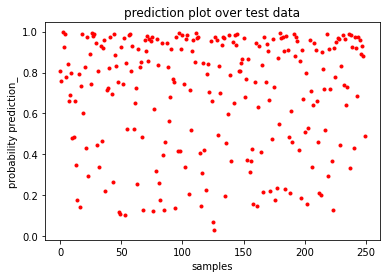

In [78]:
plt.plot(prediction_mobilenet,".r")
plt.xlabel("samples")
plt.ylabel("probability prediction_")
plt.title("prediction plot over test data")

In [79]:
mobilenetResult=model.evaluate(test_data_Transfer_learning)
mobilenetResult

13/13 [==============================] - 10s 690ms/step - loss: 1.2855 - accuracy: 0.4320 - precision_2: 0.4525 - recall_2: 0.6480


[1.2855404615402222,
 0.4320000112056732,
 0.4525139629840851,
 0.6480000019073486]

In [80]:
comparison["mobilenet"]=mobilenetResult

# Resnet:

a “shortcut” connection adding the input of the block to its output to maintain grasient

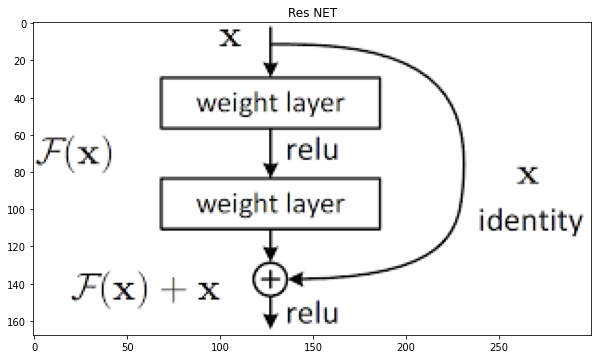

In [81]:
path=r"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAABnlBMVEX///8AAABXWFhhYWFJSkpvb282Nzd2dncHCQnk5ORFRUWamprKysplZWahiXcAG1P/9eDh9/+Ve1f/++rv7+/4+PjU6/YhAACWpMAAABmgoKDOzs5ni5z0/P+DgoKqqqq0tLSXtcrLwayBa1Pe3t6oj2+QqMOSkpIAAEzCrZ+Gn7u9vb3X19f///ZQOgBXQQBNdokmJiYwAAAAAEEnAAAAAA+JZkeggmcAAB8XGBgREhMiIiM9PT4AACG8zd8ALVnk1r8ZAAAAADXSy8M8UnLV3/f2387v9v9YbIJmTThyhp3J1+ZDLxkKGzajjncwRFpICgC0o42Uq7ixwNhCJwCBmarl39xVMgB0VjJ/d2pSOA4AHCpOZGgqFwoALUtWQ0A7GwBAU2FaZXIZRWoABzJPIgB3f4pRQjFHOx0eQF0xPEaOckk4MChaRzN0WTcpXnpONzZfepMjABGXiIF+ZVpTXHgAJUBheYZDFg6vmow3Kh5xYkA+KBogKjuBZl0nHAddLgAnT2s6IwAAHk4wTFaFlZ8AJUhvWCw/QjZ1b2gJSqSnAAAQ8UlEQVR4nO1dj38SRxafx8/wK6WyqycUdgUih8B5pIkxBCMxlfxSUqLBxLZqqsbTqr2cV1v72+u1V//rm5llYVmWsAuzZIL5fj4Jy+6yu3x58+bNm/feIHSCE4wjMumjfoJjBMgc9RPwhkkAuLyC5vDLou4QBI7kibhGClYRqs6e7jpwQpYB1mC9ABvd+0/IMkDhRncTJDghywjVE7LMY827BN0q64QsI6QOUBZurnTth+gRPAznqH1C/sFmXH8APC4VzlDI7fUmEolANCrJwbRPPIIHPXp8pRhYn+KXb3SHwONU4XC5/MXiPGix4HF4E1LwPeVNj17NUPTlY3I0kwi5PJS1Cb87k8sLo3043mBKwfuCUsJZpKQ5AsH3lzErvaGQlxN+ImWhaOy9ZMy66eCTE6Rl+gPvn79iQDsrLzkwYYkc46fhHEMYpUHvBIBLeo86yuEseJ/kAnDGWD0M7xh6uCMEirAQGH99HwtSO0uQhr1O6H0QL6xyoOhhMJYWpBKUx7x3lKidWWKionPz4PaxuBC3mICJCWZ+B0x9aJzpkgDTxe5yURhr91gJmDq0xAR4xle4cNNhe8E8wLCdK78oyayv6AUX11ZX1O8aFAvlgT/q6MFJDoBno8u/EHIOiIE/6HRAsMfjiA6QR/jtLcIfOoKbCj3JQsjJca94JGT5DiELKy5uA074IwubXO6RPYk1cEgWNkoSo3oSa+CRLCxbfBpcXJKF3HxaEGbJ0oxE6lu6YxHXh9Zu2pcsVAYerVOTZFXhVmv71EfNDaHpoAkDc7LEEhvvD1uYlax0O9ShRdbtc8qrDWShNI9K3ois2Ar+aYnSEPL4T84RnmLk37Kcz6cJWTkykdW4va1MylOyhJyEm2qDNNdCEJ+8LOXJOb6C1O1LMEEWVvL5Yb6XLTAi6846QlkSkbWzjl8zu7CBIuTt3c0MfLaOTn3+hfuLe6hwf+KZn8oWISsL+7twHtUv4/fZK6jwYC9wZhWhqS9nPNtdNzBDFioWh/1uzGFEVv0qCbvdQgXYCBOS6g8pWclrCFXw36mzp/GhRYQuapohEZ/6H/g8vH/nAjqFiSKBqFOGMYOmyErzN+4xIgt/+cKZwFtUeYSyj9L5fBbihKzsQxK13NRZfzun/DXPx/9FIfkxjXwj505vpfPpx1to6u9GNzVFFh738NYjGir4x+eqVyMQnzpA9bPuUMi9TwmIwHrwxkGTrIs6ssJPzjr+/ACLHqAsbqKwRz63MRRZCByDfiubYEhWbbW+jh4vPl5E2WvKHipZq3KGKHZDsrB6QxUsWWhmcec8QtNNS2MosqK8iZYhWdUr/1hENdflOOaB6ByBklXfzAXzooasuxeU0wlZtzFDk4SsWhlwZzr3FFE7bCiyEHgH+Ur2wdjOmoE4blBYSaMkPHPCOiUrDF73fUzeV4Ssu5isOsxTY56QlYTQ810ihlX6scILcD7Hu4cjKwN8WabGZAlE/hUDXUxTYwr/vSSCNPW15qAvr3wZ0hUK+DTaapq2vi9P9oqGDcksWQJnHaKFgTQxvwp3u62mTiShK6y5C2bJwh2iufNGBAtkNe4DzPbjCu0c9L+SabJ8IJs7cTTg00XTwvxRPF5PcE4WXyqec7LSps8cBTgniy9Ti7t5Qx0SPPWH/qLXPXI4zZMV48mtlfEMDFgY+KNl08FFIqcTPVYxmnzDIk9Ka3CMZiziXrDz6uKhbxliNGRJdlpar3TZzMlzdt2pJ1kNlnk5eaYa/o2r7HeVCVyrCE12+bxrRl5wFuhJ1uRfGd5FZKkan2zl828gl4/llx+soorBMPaf3bngTNCbrA9Y3mae8QRi7ZG6dcNgujNpwg8wCEZElsfJ8moI/arSUfnE4GjhX/09TIOgTdarlWToFr5RJrRPyrAQshr75KavDKqyWIW7PPw1NAi3JudOGWrzS/bo+DZZ4AT3AX6MPXkXzilkJen0GPxl+NswHvBkz6qiM027wn/7HY5vEEo5XB76vm5PO2yTpRQUefkWKRqhTdYZBmRF2ZL18hPB5/OlsYjNUtaExhk4T553URlVVK4yvZ0KjWQR73wBtgSfkMS8sSUryHRCLAKehYUF2Mas3GzuqgJsRM6oCqN6meHd2tCQhX8a1IDSfKm0UPqQMVlsh9J1OhFK7NzKa3VfEn560rKvwibmEAaAjqxIK4SrTdYMA7LSTKMAH19Qt9pkoTrca22Phiz0naoaCVnLpDxZhYWCt+Ap7I9Km4pKy95CKQ/sqdvVs+zupoGerCxsp9PytwpZEdjMZ4EFWRY8hf3xcr212VTwiAazrEHL+rJbwX+n2CbJ5wDPtvAAjHSLle9hc+UHJmSxGWo2sF6qgmY0M90cRddW6Qz6eeWd7aaDrRBBZnKdJMz+/uSWZodifqa+J7XBhB8BXDQWwdhUHQr5mJJ9Pwr/Hytf6bJ7v2OUnKTDHWx0+Zov1ESZYT+SFmHeBZ7ySKJkbXMs/ziqgXRAqSg2iinQQ8kS0tgcFxG2ytOWbdfkevc+e1w0QLLvR5G/dbjOyjoAflrBPTGUrfvtJrvG+fVbRucNjQBMjEaw+vWGWVKOsHplIInY1buVGfTehsCNcCSJgX1Nh0nYbBiVBjV18UPfskNgNIJlwoJPgVE1Y74wojql/cmKAPQNG2OCqGNQOME1+GctyHu+70D6RfQG2DaHpYUfBv7GQ8DKcC8GfWogpbZRdckwk4M1/EeRj2xpbJw71PknpFMkijwLsxv2B83zHp9FpqQPO1rHugAL1c9OJ5k1tRn8k5XhJ0KLf7IStkaGWAL/ZLn99j2IRfBPVpnxjPQQGICsZX0vXQhY9PFbIqvIT7K06ez7NkNffaQ7aEdCeRscLWhgkiwx2h7Vt7LvL9qYfT/QuXajP1k+jbFHZ7gxWTQxTJf2K3QG1Ypp7Wd0l7RAQBD4qQRoRNb0+eYk6aVV1Fh6tvQ0rmTf18AP8BCd+hYP8w9QgXhK6QCWkLUMn/2Cx/41Em1EJucmwQVbCE2tv4Ruf6QVshiHOgwFI7JqDxGaI0PTmcUCmWZOrVKyCAfJe1iy8KEqcYpom+EyIfMp3tyg83D1e0TPnUZTcMEgqtUKWTxl0RmRVcWsPHi3il9peQJUmUWt7Ht8iOqsO13Z90qO9M46LVHwKTn06xaaemt0UytkuTjKKjfUWTO3wtfCs6j+NcnsnZ8vvY4rab+LYuptj4TywqviwgRug9lHhOAClPDnsAQOl/ZLwFOdNkOy5g6yB2jm9J1bKPubsoc2w713HhLPZ0hW6m2cSlYBrl/Ciky1NIYmSzCc2xGOpnK1IVmVRz/cQnP7uMlVm85tQtbUqkjVT4usi80Zb0LWf0iCOcm+T31OC7M0p9+GJiuo8WYlv1SNX5rn3wMFp75kFTMYkoU7uhXcHypLOWWi71ab2feleTLt1Mq+n5xNtLLvayDtPidfoQJv6a49KbN0eniytEGStVakQo/g8Sx5nAjpfpO/m72BFRjbWctkQkWmswDL0WgujgpyHDdO/Db1NVomwWXLxPqRo9QGIgfRciBXoNMwS+eUfQEJy0TD0CVsgSzjWOUeZF1qxR/P/Wb2BlZgYWxIy2Vd6je93RGo0gPmyepICmvQgU8jk1mhZBWkRIDcC49VpYSMN+QXmzI+XdpA8tpNWYpL9NeW2TmcLZCVhGeOpe711XS49HX/K5knS9L6lLMkEi0Le+/ATyLAln4KrJGOZPK/t585iZV8/5fPHHtxEuF6//msoxy/ROyeCLBTYZa8Dg0TK341TEwNmyer7NK8IVHZBRJ1VgVM1kvieyfNbZLQUacjDtoMz1zA+0lIWoVYyFkTkm4WfPuzOg0HQlaFds+4GUawFSfSUdkkIaYK17vIQtOY2B0Tkm4WfJPVWeeIkEWbIiGr0VwZ8DCyamc1CRUMwDdZnYWDFbLI0AqT1a5v2ZusKixmZxkGH3Odfa8roKU0QyIpax+jwpLqzTAk6w966O6BmWovpuEvekcPt9n6WZ1GFk27efA63VgjCr4OW6KwjI3Pyd9Usmqz6VgcLV0gBzeWV4h2ZxoykoGJQQGDf3TB1OxxQDdxn72CyWrcANhOErfZG6yxZre0khX+ES7H0QwehRWeEG2G+84/GHI1DOx2jvt6lDpvEy10ucrEzq3C0mjCa/rD7tBu//Buv+SgQW7MYTNZEoOZijsPGTwIE9hLVoxFyR5+6knZSpYP+Jm1ZwE7yRJZLxd11LCRLNHD0WwhE9hHlg/GiqtYjtpZPlv4isEEZ3WChwPWKR5YKNpil0pjptvp4o0TtiQ6iQ5u1ygaGCJNdGLfCmUAmflFjxwZOxKdBAc4+TEk2UFkn+gkeIFRPjR3yDC2GwlVmXEUKwqmXaFvrKkKSuWMzMgcEmXPGFMlJEAxHTwMSp8E3QAueVypIuvMZnI+JOal4rCOlGCmhC82ToMbHWTN8tgJcB126qHwRR1YOENcrs7HCsEOEzs3WG2HtIwbH7gCRxOVdhh0T9QY7mrzTZOhKNMXb3sOxpS+F9NyAutzKCWCPOqpd7rQiPD+MFeT1TRcdbBTagpa2tHHaS6mc1Ev4QmcgSAvfgXhHbRweQWluuYZjaqZmoZLTWlTyVKC82L+3kaqEJMz7jJ9nglnNMYLTxS7G81wG4RebRlWV5kbPFpCbPV/qlEq4yFirkjkpXWOIPjS+aAUTbhdxeav5gll5BinvV6tVWDsgUFiTVg/UZsyHT5Bo4BiDqfTib+/05kgfs2Mh/ogig6PBzqw4HF6E1E5mOdRO7Wxo2YMVwzD9nd0TTNlOlVJABl3iH6XywUel8vvJGR5iwpZIbc3kYgGJDmXy8XS3fPFnKJdrXDuvNHxui6hxjxZYstUUJthDjdDmbQ2rtbIsYD2IlR3qQyl8He5htAlaIaVVJ52nt9BVmEJn7ZOM5kM4irKnuaGquCVjG+stSaYPf5okXotS5IsxfEXb872p2gw5uWmFVG9oju/U7IiZ0gYVM0w+T+gBk2pZKl5ubkSP5mBVhABEgbl39KU3Sy8gO1wK04iosun1Cv4CpbA+qbhtUV1PqHZDDUxCZx2dn2QbdXgbNcojTyYnW2p9RZZhQTFk3360lb7SZjvFcUdaEbFKoa7MMTgkA88boUlaQq6VuBsN1m0MqBPSG3QV03/NQc9Q95DGn9yrMTbWqBWUWnHfmva24sEnFX364vidvWG1cu78E2v63tVP5aQgNIx54quJqti+npzY20b1eF1k6Pqtc5P6Mki2m3NIGG3idw8Nsm9Ttxdeo+LMWWE6tK6VrAwcYrBJaZI1zap1hBO6pYk0JHVeEAWDrhxSCZH0OuHeUf0eItVeAmelbXmuWJ+/g8LwXVU+K4EShHhOV1xrg6ywvjkq0TH47MPGURyVHBhUIhS59Rb+JrRWTM65W3egm+j53z0Mi9Rr9ZxykA4ujwRbwbIQxjNujujRcTAtrzPIkdjREvJjBbJrlbRvezTIBhLslBWVwM3yaYmbpus+6ffLOBfpPGuSMrBU7Iqe0R41+ypvnsMoVlp4M+b0W1ssazns6TgSnsNiyW7yu8eO2jW3blJxOguseTqwHrdneOPWFAbU9pcHeX3YDD4hvm6O2MAmKAxpcqImpIVhmektq0jfkKWHhltTGlTstRRAdt1d8YAHTGlysoid9TxJu0Nifs6yWIpmXGANqZUIasCX+Zyr94qlWIK0zfl3Su/nJBFQWJK1e7wZ8XIJXaWl5RSOFDe7MdrJ3aWAtYxpWMNcUSLFI0HMsfb83eCE5xgxPg/TgXffMpqhEcAAAAASUVORK5CYII="
description(path)
plt.title("Res NET");

In [82]:
from tensorflow.keras.applications import ResNet152
model_res=ResNet152(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )

234708992/234698864 [==============================] - 1s 0us/step


In [83]:
print(model_res.summary())

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [85]:
new_model_ResNet=hybrid(model_res)
hist,trained_model=model_fitting(model=new_model_ResNet,
              tuning=cp,
              train_data=data_train_augment,
              validation_data=data_val_augment,
              epochs=108,
              steps_per_epoch=10)
trained_model=r"/content/transfer_model.h5"
from keras.models import load_model
model=load_model(trained_model)
#prediction_resnet=model.predict(test_data_Transfer_learning)
resnetnetResult=model.evaluate(test_data_Transfer_learning)
print(resnetnetResult)
comparison["resnetnetResult"]=resnetnetResult

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
resnetnetResult

# Inception: 
@going_wider. n reference version. Expand across width(many filters on same input)

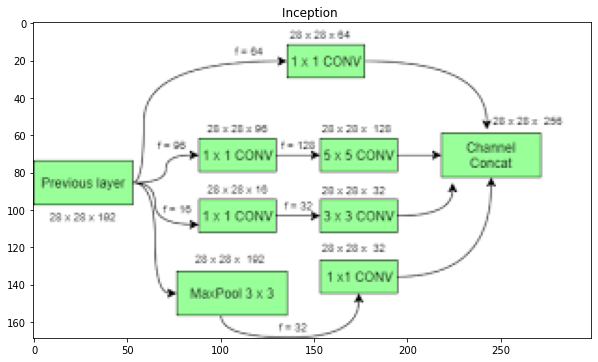

In [86]:
path=r"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASsAAACpCAMAAABEdevhAAABCFBMVEX///+Z/5mc/5yd/52/ub972HtHfUdfrl/v6+/m4uZXo1dZfVmqo6qI64j09PT49PhPl0+HfYdGikaXl5cAAAB0znTJxMlQfVB9fX3s7Ozy8vLd3d2ysrLn5+eoqKjKysq7u7ufl5+1rrWB4oFRiFGO9I7S0tLFxcVstGyJ5Il3xneD2oN4eHirq6tio2KDg4NqfWqOjo57zXthoWFqampvuW9orWhjY2NYklhRfVE7YjtEcERVVVVcslxKSkoqYSpBfUEgICB6cnozMzMvTi8zVTNJO0koQyiH8Yc6KDprYmshOCFGZ0YIVQg6VToXFxcWJBY/Pz8ZShlUYFRRZ1EsLCw2fzYhaSHWx5WHAAAUuElEQVR4nO1dDZvjtnEGQUfni0M4KZRKJEAQsSlS4IcYkiJFr9aXXs5Xt25d55K4/f//pAApabW71Le0lO7u3UdaQR8j8BUwGAxnhgB8xmd8xmd8xoGwHYAca9EgDrActGh4BAATbfrcJwgL+3HsYwCQ/LMZ58xnzSsewxZ6Q7rt3pWB+B52AGCUyobnONiTBDIPsDQxKba77t41weEAoxQBU96A7wAMUvlfji1uOjS9Z13374pg3w85j2IAsMcAuR/6NOJyLkrSzCSShH0eV5/xGRfF633xeS5+/fOr/fD9/3Td1ZcB4guD0qMIWI8GyNe/1+Fe0L/qoucvD84AIp4JEI59ENH1lyRX2l6AnwhXMQM2pQSQIeWU8vWXPnP1BJ4HSJo6wOZyZEXR+kufuXoCstzTsSEBtrf+Us0VXKOkvtf1+g5qULbVTd59IlxtgA8armBZk1RTUgh5J3oDATV3kOlBoYtsLKBRfiq6fQNmv1DFlRgMJD8BzEYanPwQStLuDDg3XKFXYfmjkY2DiV58alwhyybE8zzHcXyFuN9/+7uJro1cOaKCcqxm30RyJSo5xESlwzAfjyVf2gC6I/2r5kOO43mE2B+lWwtZpu3HOE2GkcQwSTFjlHN50B7t9z98o+ag4kqOJKWjaq7cBVciL8O8LPUqqHT9K09RzCljC2FKFvdM66NgzaM4mc6iVHLjEPP567NfeKPbe2oOFhPFWP5kDoba30q9lDOzRbebxKcMR7Npgv0W8bcBRHwcTYeYbvdpqgWx5krOPqPQA6XW1Z1muEq3V4NQPqdnARTVdpsBeSyZTrF/ay5Ui7BhlHBi7zc1VjZDsw4+sxkakwHuYV+ZhCZRcjsDzGTT2WHz4cy2KKHR7Ba8zh6+T/xDP3QBu91J7tlV02XHUUqOWJEussdBznDo7X5bNyBRxI9bui/lkyF4yo/q0IXhT5OjNerXP/92Txzs62P3B2uES8Ob4lPWni/3hbVb1hMgHF2VFWElyRXrUTKlu9/0UuD3V/XLPQebHT4eLwIU4a67sBP27Cp+TXN2tQvzGtDsClS8d38j+4nurQfnWjTBbkw7Hv/mrYwqoKZht329v5lRJWFPu/z267LydoJ3uGB3+d1HYdjdb3t/a05uO9r9nstAhXfeGIYdbcXQrJvvPQUk7eZ7/bib7z0J027shuiW7IUlaCdbne705CkgSRff6tziFASok18Y34J74TmOd3SfgOiKPaFb0ImhM71F1S73GsqfbNtrwb2PGgCR+hn7rCPhJlU7AF6srCzsYcybJxyMvXQ12lAaMz/1CcPnHArDM8p6Mdi+TT2paH2PxwSYmCqOOKGxDRzanImyKJtilkTn3L/dJFfglw/v+g7gHlI5UsBTm39KTObJmcnqsUUosAFjpnNOQ+w2uWL9/gw47xIvjXxAMJe8fUi8JPKkIlPjCr2JYh4xezh92XFFooSky5ACTzaSZOETkb0xk3S7+sRJ7CQLpw9KE86HDzmETB5MQvDhQSYAfeh3YOvs5goBx6O+B2x1h6SOoJwA32cIYKBCGLdbOgjFjiOnRqwmi9Qi8uMAMYfLhqkWM+JT54j1n705/DMnY4856PiIca6WGtngnsm4StKVvysdJtj0dowKjLjPLDmm5IpkMUQdSfLCTyCViscR8485n9yFLbqbK/+DXI1TDmyVtkzvmZekUj3EKQIx5vZwu5MSvcGcpvK9mGNgfcA8xhgg3OSmEOop2fiKzr1vxR7jCiE1ER8aD23UvLj9w6h+M1pvbJDdAv9uMPhusMR3+zXmX+w+qCOAOtmw748vvt0zpGs9usv45iJ9sa6dq9/A3WGCT/HtZbiyt3LF/9LbD/+2QczJAq6Jq5Xn2louLLYJzKXJJGfAnviDnM4rQwsBSyp8FXF6kIB9uNJ1rY28x89dmiu2NDZxarNlY/9fVR6qMitq8KGVMhozdqCA3VxBMa+0UOjaKr+uuTVZB5fmylmY1Oa9tAeUDU5NaRMsT0QfdKgzChxl0iNbyiTcUz7xM3Ml7nThFuV4pBXlSASlIYJipI0DPQ9fgKtlaRwQg4YrbzhlBOEjuOJWwxUAqaQKYBujM3MFgxJqo6IqqiwIyqI3zvNJXpTBJHgRrvjSDlxy5kUYJdMN46ppLXJLtfVEEnmodGVKY/tDwulwMQfhgwzYPN4gYDdXxRhqehEYlVHNJ0EhJhORjXuD+WTyElzFG3codtNTaDx0Q89Uh0VeaHBUTjQtMGAoAvlMCFsO1WoEyANaHe64zvzaV8CiB2skiLlu9BRXVRjmQSDyXHJVGUK8yLhiG7frfTkh1aHO5aGOhKbytsr3I9nfgSgm2kCI3mhe6ZOwJ3Q3azvURoCeZ/JDjQBRjQ4X8Ei3Z/OeyEJjHA4m4ywTRSHCYNTrGcVL6PYNuUFyM5L236bfSK4KpSOqsJD3oTuShBW6JlWqLkmoKlGGcl70oDxU9BSNAH0+XwqA2Y+ucbCAR1oAKptBTevamm8ePrcjLsRV+mwzZtJ0Oo0SPO33+3+VczAs1bSZ13Owp7jKap0B4ThwhTsJRZWVUP93/AyNAD3Qqgw2AoQIJSsHCni6OMDdq8WFuHrqj/amQ9psh9+9Y7W+yhRXtaJpuMpcXVTChbAnXK34MdR6d6NW1bwQIOSCDhsBQmU/HyzgMVNGkD3jRjxpb+XK2ju5Yw01I4/jCVG68nIidQZEcRXKtUeUMJfHo8s5qGnlXOWYDuaZVkGtF+rlALYd6kKAXkrzsREAxWAuDhbwmCujF0wKOJJT2ahvsm+j0Xx0AFd/3zdnaB3/UP15zNXTgOjVkr9INNUXOgM2d7JZP9S2LfmwzkttBOjHCHg0rJSyy4x5ryzn87Goepmbz8P3j1bBHVy5hzsuoP5nxdUj9xV76nQ7s9l9uoA63VwPxlpvkolJHuowLOaG+0TWDq727NH61yqu7Eehos+i1q6Pq2Kij0qpQnuTMJRcSQMkfCmu+PpIQs98pFfHlaZV87twdHdXSK5yMb/L7tw7MQ8OsBmO5ipdd5ajZ/HISt3shy366lQBj7ut13puoXPkf9lWOu8FuHoUzUCec/X9b/bDt5sO9WQBZ/f1HcvV46C+53E65hf7YsPJnJMFXA9Xj87MeZ3mbmyANNAOX+J3c1XP5AcqnjDTytX6uT1neo1Ra1+8+uMmhBtf+X4XVyN3MJAbL1hbd3IrImDzoHEUBQIujcqleflnYD8sfGY6vMpUL+tfN+KnzS9tOxTFlejpmiukiVaFRqhloSEfqKJdWlAJZcOJaiyEbJYTKFfbmquFqxg5bHa95SI2wesfFwapuDLugnFeVMZc7UklMUFPzOU2VW7lDbmnn4Sl0ctyYzIugjJXlbz0f84iP8ZJNE1uMr72Tf/dUZ+ruZpnGSwC8YM7F+44GBeuXsqba0x6oeKq6P1oTEpRzQe5quGlwX/60dv+u/QW8uFa6nN7/f5xA6ueg3OpkYrAGOjFqLwzxsFAG2Rz7U6Eo0qHE/lwbhTv9TIzsoYrZV/RGZ3uDHDHDPh46btJY8BXDWIC9hIl2fvPo1rfDGfJh2Nk1bq9lMcfhno4L6AopW5Xpn/hlqO8J/VVYJRuaYQTHVa9UX02reYKkCliO07TE+JxRjiwbMsGjulw6vmAIIKAfU8ctqOMEI6ot6pmkEbcn67I9aLEjPbJ82T9fsu7joxIdPWFWaAWOR02LpB6HVy6PGonyMhVOn3hcW24Ak4C6I5cS8RMqvxaVI0ni5ksNYHNYlUamcSSua0fliOPE4oAJZIjC8XcpgDFknpV/S+1QP1oO6x3/ZaBdWwE9b626PrbFlwB7IPti6CFgYlNDGpO5X9CbVX4nwMV+usTf1esmunTWJKsYtUAtrhqLGPVGCJ7pLiwd0PcMrAuzNVTW7TGPbC2phB6wyGhiQmIY3vATxKbpUhqW18eO7EB3j4o0ZvYoTG2AJNMW2+oI/8jhJkimLPUv6f7WMBJS4iW1QVXjIML7m5sqf+JpeaiuWioiVyfPAS2iey9apLNWt5kn6KvjuVKMsWuoPLIFrQGPh2bFncaV4n93Buz6OTv9sUGjXeygBqtIanekdn/p3HlM7ApUuyPxn74j03up1MF1Ky0zrZjc4/dfSPC1rHiyow22SoHuoCXEVh2wkBa6+OTfchKWnutG36k3vj774/AP1Yfj5572o/hypwRadMzaTMBTEyTnocrc8NFwNiRmzP09RF4+Dhu3HxyQWzAKcDJ8yiVnYeq0oioqiHppyrs/yxc+ZtK7XRUo8HjKuPSbkL75OIeUycdHscV8TwEfFsKqH/2U7kim4u9dZQkaqex2rJLZclTdWLcppxYatv2JNTs2XnnOmKl3lnVh7qcFYhxu9knrs47Lz6/Q8AT0OmWWosdJYla0/pc/WpTS6iJsVKd6lDLyWJ/qUFDBWlouQpHGA/mgTYP9DIbGHpZtJ2yUsep4q/m1VKAmNfxDPsIQB6NpnSLnXp66Q8e+Wa0XEzjyLFXEQpynPiRR6atLpQZoGkTiNd01JIWtnogD7VwS6iJsfJiGFUdJ1PpxkRUUHkR51oZ5pk+EG1cvXmbWpJsQ3cN2AgYaVkJtwpAqpq+R9NhlPrb9RE9OYmHKH+SXIk4onUDy8GCOOIqcFayhaVGauuCHM9pG4nyUPU6/mpcqQHxOP6qDKpgPA7DyajS9P9Mhk+QzPr9/k9yYE7m+kIAFKrO/SYBUTSdzmbTCFPu7d74pKerK0ZIIocuquOBVYNLzmqLAKOUJsDnbZ9SOYC4pfrAKv6qvhJCw9V4rGthNtbl7HFVCXvNrcJWdZP2f2W1violL7UAqBu9AwRswxkqBqVSqXrYBo5a/4e+jYnU1RTXgdQIU7njb7VKaoe7XHPW2VqExsJMxYvmobqUi64CnYxeKFWYm2XuqAfFf4W6+0N7+NRbOb6lgDx0BawFwKAopLB9BWyFeXoekc8dpJxvnvxDvhzLlEg1WS9QRF0pyeN+2/COef3PiSK2Gtq/xs06aMjJYwioQpyaO2McqICVQtNC+YzURWH7kq/sIhXXV4RwKSAo4AECtoF3lnO4yggAPJlNccwdYg/7b+mO+HZtecWErWEuj+LbDxWwCd2dzXy0Z7dMj+I0vW9U80mm5Fn2g23osLpSm7Hyph/Z3cdfbcAqT+rl0aIpTTXKr5arjuqqKWzK5N0/g3YTV6cKaIfXUb2+Ghu48v/7q/3w3YYt7skCNnS3y5Ce26qUYnUaKXZbXCWdxqrcFFek297eFFcdl7q+Ja7oS0TmbMHluLI8BLylNWSqxsOGlNgPV6rdG6jtJPRL4mJbBoQ543QRsIUwjelDVI4TpwSzQwPOpl0H111we2VTohxEcV0lnnCP+as6RV6iSu4dJg53PAOfphGeEzYF2MQ2QKkJ6lIEFrYW+08TccndYeJ2xYq9AC7GFbofMkeduMKeiilKKI8YsLCqtKbi+pw3h9lK15CvcCM13J37rnsA2gOc5CTxTbA6naKC09bjgeUa5gDiv+QZTX7WaqHHoj28gjmMqgjk+k82YmfRkEixKV+UT75cJ3lbeN/LY4M/yKZmypVzWzFCuJ36ksC6VAgi1PORCh59sT4mXTpi1tAeSCGJSFU8ClJRyB4HiVzSlj5UO0bDhNe1L7fg5FphD325hque1WgvqDodsjr4ghEmzeVh7Kk1jDVDyeZqGs6i7RFjJ9cKWwCx6GpSq+ILGcNn8iHze36Z/h2DS/n6z8IVv+/cVl/HpZaz07my42l8FcvfCpe6LkjD1dMc2dWpVPjwv50rP4r4ZXp2Ah42z69//pdj8b9/eiq25gouq+VAUVfJGecG1Me50EWmj8LM0LSgjSsvnk7ZdQ2pBg9XFHr96pig5hqjVq7g5L2magkJGP6YyWZVCNfIA+GK4G8jURVjPcsfxckgkzg4ilLnSi+Fka62sK9fHZHl36Cdq1HoQhW2NYFikqkwGTW+XB2GVVblopJtFZv1B2TaxOEMJ8NplHLvGhPVF3iIyzo7VxrsKYnzUE68AGoqEks3KklaFQR5ketVKF9vaoUxetUkLfCQ8nJ+rjTJBQzzEsKxHFfaQOiT0B3pZRAU8H2ll3U5mAPjZLrEQ5zcBbiq5C0fFaFeKH0VDualJgaDCcwCvaj08L3U7rfE1cO1qi7A1apYWGMg1DU36rjtOmm2zpu9Ka7M5amcC3C1D26Jq9WFvVZcQW0tJA+uF2Cpw2QfmquHnwxXJFJhpg9ciYkKhlWVVdSMKXuDYjGNYBjK2yBbFeitqk+NKxAn4N0Hf8kVDN4L/a7Si7ERakL0hF4JUQo9G48Ug4U2GEnLSZMmeSiyRRXfVq4uEX/VPWgU9fv33yy5cseiysMiyMNxqfWCsCfmYS8cBK6KJm6Kq+ZBoDR0Xmzk6tRaYVcLk/X7v/xpyVWZl0GuufNKrwJ9MCmEkI8mpeYWiqtQVfQR8zoGuyw3cdVaK+ynA2qFXS8+/BqDL5dcBfmdyPMwrIw8h3IOQjGAg6Ay5mpcBfpEZYmUclyFhjHYpK/aYPf5hQ/jRaDyJJf6KsvC0hiLeT4uoQgmykNQSAs7H4RhBmEwkLsUUWjlSDPcntg0rtoQHVlg6AqxXAdhswTqEK6Mh0XVlfqJZ9Vo9+WK9Psfx8ACZ7ZFWzCd3SfvrtEtdQQuzRUC0darUt0SLs1Vx1HEZ8XFuermmt8XwcW5ak/3vElcnKvk5szOjXj96ohKsTVazk204Ni6VdeI1//3qhVF+9Pr+O0+XKW3WKBzE1634su/eu0vrGMPW8D8eFbBzTg4uLodm8rDfFQwz6JnhvwcUq4e58iuGh5Z4OvWYG0vWr6sAmAmDOBhq+ZC01u5OvHJsDdU7aphzQjwMVN1HjGxUVuMEp19PJbVbkRbLj6P60JhFgBOChB+Pq686wx6uRycKd60ji0LhTlEFQp7QgtyttH8scIZztqrRa8KhcXcZI+L6TnpjH0KpkILnHQaxc5+usd24mi64SKHnwhsjyVRlGDu2bZpPbsmfV3yi3CcREN8A0FCLwBkez5nqSRNYZgsMKybCab+NdL0/3MVtJqIRcgbAAAAAElFTkSuQmCC"
description(path)
plt.title("Inception ");

In [87]:
from tensorflow.keras.applications import InceptionV3
model_incp=InceptionV3(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )

87924736/87910968 [==============================] - 1s 0us/step


In [88]:
new_model_incp=hybrid(model_incp)
hist,trained_model=model_fitting(model=new_model_incp,
              tuning=cp,
              train_data=data_train_augment,
              validation_data=data_val_augment,
              epochs=108,
              steps_per_epoch=10)
trained_model=r"/content/transfer_model.h5"
from keras.models import load_model
model=load_model(trained_model)
#prediction_resnet=model.predict(test_data_Transfer_learning)
incpResult=model.evaluate(test_data_Transfer_learning)
print(incpResult)
comparison["incpResult"]=incpResult

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 alization)                     )                                                           

# Xception
:xtreme inception,Expand across width(many filters on same input).: 
less computation, Deep CNN

In [89]:
from tensorflow.keras.applications import Xception
model_xcept=Xception(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )
model_xcept.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [90]:
new_model_xception=hybrid(model_xcept)
hist,trained_model=model_fitting(model=new_model_xception,
              tuning=cp,
              train_data=data_train_augment,
              validation_data=data_val_augment,
              epochs=108,
              steps_per_epoch=10)
trained_model=r"/content/transfer_model.h5"
from keras.models import load_model
model=load_model(trained_model)
#prediction_resnet=model.predict(test_data_Transfer_learning)
xceptionResult=model.evaluate(test_data_Transfer_learning)
print(xceptionResult)
comparison["xceptionResult"]=xceptionResult

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

# VGGn
n:Layers depth.very deep convolution network.(same as deep CNN )
 


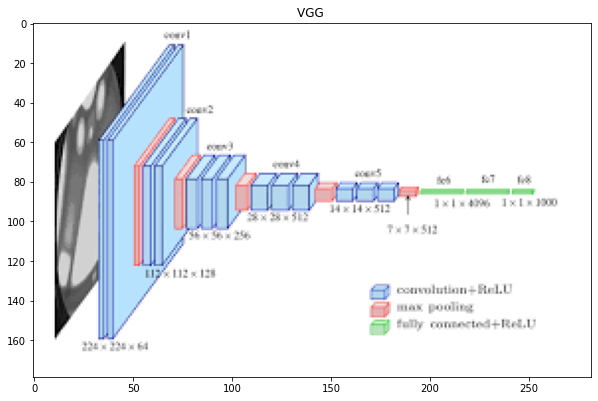

In [91]:
path=r"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARoAAACzCAMAAABhCSMaAAABzlBMVEX///+24v2z1+3R0dEAAACoyeSs1fp1i8X6+vrJ6/92k9222++65/9wieHW1ta52/Thubmv0uzuwr7xe3qJcsbO8f+G3YWX25p2dnaG1odeXl5sbGzA7v/y+/JbW1tUZ8Tjs7NlZWVkgcO64fDy8vLIxtzHx8dTU1OioqLm5uZfdNftx8Z9ltR5eXlfX5unp6eNjY24uLjW1POJstmix/Ozs7PDwe1oesNge6+oyezQlqmXl5eXtO6Do99UcbGat+aPj9BGRkZ3kubW+v/p5/jz3t7dj5wVFRXmq6tMXaAtLS72qKicocH5lZT2vr6Gp9mxsNi44bwwMDHbtcNzj7gfHx/8oqHH/8p42XhQZLZlgrLrkJDlnp+mpdyBn829vvdydbUeMZ3Ly99EUaFidspYb7p5fcZDS4s8O2RMSVaTutFETHzfiZTmcn2Qkrtvc7dAQF39XVcxMr1aap73bGtzYqWliKkTFFI8RZROXL7Evc+IbaVjWaaJo+oGHaMAAIa+nrl5QYOfgq4sK3egnt8mKqP3Y2PHUHBeNoz7RURGVb6v5q/S7tJf0F9Gy0aqeIEHIIVpWI0ADoWPOYVZbNZyhJZQXnFabH+f8KIxQqPZFGp3AAAY50lEQVR4nO2dj2PbxnXHQYMmjxJyEs2xgQmGMmT4iLOEAHCI0gwi07KkULEr07FDz/KvuDbltJ3TLo3TxWuzdm2SLXHSdVvTNf/t3juAP0RCCmVToiTqJTLBE20BH733fe9+4CBJR3ZkR3ZkB80Md9RnsM9MNgxZ4pRzWbJGfS77y1zu+dR0HG66kjPqk9lf5jrcoa7jSJYhaaM+mX1mVCKUUGoQyZDJqE/myPadGfaoz2DfWs6MbD7z4PzrEnyd2ePT2UfmxSO9Zrm5lPz4YiL104d7fUL7xng8Gs1Mtlp/9NbS+hvj6zXFaDQXE1PrsfJSsjK+aMx4LQrNmfrSugKOM58fWzQ8XotCA0IzUZlNT60rsbFFsxhvRKGZyVYWquA4sdjYonHAaSLQ/LKSWo81l+ZL44tGRjK1uNfTfG4B/GUmVUkqY4uGXI9EY6C/zIPjIJkxReNfr0WhaYK/lOaF0IwrGrZYvByB5l4pNYNCU1XGFo1RXCwu9qM5N7+0EQPHmVXG12ucxcXFYqMXDdnoFprxROOCzywWFnvRPAZ/qYDjJGJji4YXi4CmWMRquGvGAIQGK5qFqjK+aNQATa6xCc1DFJqZqUq5TWb80NiLehG1JgelTQcNAX95Y6HUEZoxREMXLb8g0Cx2o3k81SM0Y4jGKpqmjlJTKHahuVbNgtBk63VlfNHwnGZ7mkCT62jN8sRSOVGeSpe7yYwZGoMtOoypiAZ1OM5EKwF/qS6g48TGFg2h7qJJZWsRwgl1OERzcSoxm0DHGWM0nJpFL0BTKBYWQzQgNDOxjR6hGTM0hkwtjQk0uVwbDQjNLAjNVLmHzDihIZTKBQvQqIuFXA5CKkDTzFbrdXScXhsjNJSC1DgyZVoxpyMaIcMXwV8S5aXZSq/TjBEaLlPqF31Aoxd1XQexaQCaa3VITBvZ6kIfmfFBA+FEqVowZerqBUCTE2iWZ1Fo0lMb/WTGBw2SYYWcSamXyyGaQvFyXEahqdZ7K5rxQuNCOFG/oNuUmgVEAxF1Pf5BYmoDhaY0xmgo1DMgMoBGlgGQrqHbXI9Xs2LIcz4inHrQcIuN7OR31YgOWZs54C6m7DoFXQvQnF9KViYqkUIToGHM8Azmclfmkj/qi9gdM6E3aVm5nKaZrm3lQjQfQGIKJ3Gj0VAmO5LjuNRhEj2cy/porgBFXq6gq7ppmxqiATY/C4QmWYp2mtgb1Cgw22WaKWOdeDgXtzk6oCkUCpql+6YvyGj6z+tibqUULTRgv6D4d4lECDiM+OPwmWzlsGdQyKmIxgnQ5EBoShOVVJTQKIoSU/IBmkNtzFELBUctFjXL0h0/iCftn8BfcBI30U/m4ZO3P8zPXnjn9V9Kv3rw4BCvduQFVS1qtl8sqIBGswIy/4yrRcpL829EOE1m5eZHC6Xs0sbFx1PZ1E9/POor2DVTC6pWdGwTc5SlQ2QhmuL9YBJ3op+M8mRlLvNkPputV39dyWbLbx1aNOZiQc0VTGbrIRodU/fHOIm7eW6lReYPV1eezq1nU5VyYhb41EuHFQ1tgMYUdJd6um45Ao0QmgoKzUaE0KTXeObqJ7EUYAM+6dn8oUVzXcyraIy6mm55ARpVCM1G9yRut9Bcufmbaja7kWiC0KwrymFFY8ULRTBLRjQOZHGUmp8LoYlV+oY8UWjm5jI3yhhI9bdAaBKxw4qGxRs6onGgb6npvqwiGf31pXoVMlBEB0H5wyoIzUw2O9VMIJ8F5bCiIY3adQ3R+BS8RjOZhvH0s1Q6GTG3EgjNCgjNVCr7KL8OfC7kY4cVTa5WAw0GNGaAxoWqGCuamdjMUt/cCjqNEBoRSCA02Wei7VCi8eKXazqiKeDYnq76PnQWQGjKiXIqESU0b4dCUwWlAT5iJP1QouHx2uWa1UJj66qlgdf8S/JCvf7p7Sih+dcrIDS/g0DaiCGfYCT9UKJZjDcaDT9EI5s5VdWhk5k8DUKTTr/S7zRTaytrVz9JQCDln2VTU+v5WDQamY/kcoZoBJ1m0Q7QyMwv4PBVrnAe0RyPQANCs7oWCE25JTQdNMSQgIghGYQbB368j8RBalRPoPGZ62DvKadviUYIzTQG0v0qCE17JD1AQ2zfY77luRrj8oG/+xvQXI87IRrbtgrBHMsWaITQnMBAgmoQ+HQGuAQaQzN8w/dll5mSdODH+yCgrsc9RFMoOKapYSGsa1uhmcqsrK3+NpHKriszqbbQdAJKZpJruEyWDMM98ON9Ag3zVERjmX5O9BG03GwkGuXDlatrf1iAQKrMVlKbCuVDmKFIvHG5RgENRJLmB70nSFKRaJQ3T6w8RaEp3a8Cn2TXlN1k9dqKtBxY+CqR8PWgGolfblznEFBiiEZHNKplaVFolH+9CULzu1QKO+TZbPsuBbDMzSuZp8vNz8D+7dzFCXiZ+P3yDL599stRX+ELG6CpFQQanMZFNJrlOFqU1qDQXPltJZvF+8RSXQNcypOVlZWna6DLoMwzjyFzZZfK5ceQ27NT6z8Z9RW+sBFIUBa1tWCGW8d4snzfikADAAKhmS9NCD6dOLu6Av3Nf48Br6lyaSObSmXvV89X8XUjsTUavs+FGtH4HTRQ06iOZzv9AYUAnk5jIM1X5rNw7a1vKQ/XVlZuXvljCVGsx5oAKFVJJubxLchRDxouEQ75yzC4pBujueRBDdF41NQKwVylDvFky7Ldh0Y5c3Mlc+KTVFbcvpEN7rsMhWZl5UTmRhJRzFaSlZQQoya+xbpnMxrGbBvIO8zzmLnPuxKIxqWmXggmK0GKHUYp6/eaj9aeXvnNowcPHsXWNx486BaaORCa6XWBYgEyF7xiJwKjCz+1GY3pcod7piNpBtvvqypQhmXqh2iAjQqdTFlO9qKZypzKnPiHdPrY2fyzdLrUzk7KDRSaE58IFBuBs9TrC4HQ4Ad6AsolnBnMNYyDoDWXL1NEo7XQuIim3I9mGtAcO3b6bH5m8lgncaPQiBF0ITTrQmhmE7P4Nrg7cwgZyhnNFm5Q8i1CVxA0JmSD62JluS+gtkIDQjOXuTEbaO58KDSY27OlQI560ZCIoyijsuEaMuOMMms0ek1qNZ3KDi6q0VRk48jydmgmN6EJhGZuBslU5kuh0MwmWkIDZeKHa2BfSY/LgT269nA9PPyT9Kvw6NNrfefFXVy0A78nh0lkNJ14UoOyhlmieyDQCKmJ0poINNgRh4rmt1NZRBErB1JcDysa/EQa4g0i7um9UlZY6tnn5eBoaf7je4ngcCpiwtzIMZu5ls2YTOXt9VpoVl+2Y/CXHK27mTP8GlzgAI3TRgNwVG8HaNKZuTkQmoUpsI3YegVeKjiWDhbeBi7IXF17G6scjLKN0hep4Ki68HE9bFyPmjAnBC6Xc4glsn2Sp6ZBJL835oycwbjEupstzolP5cHRNOI2ZSpUegGaQGoGCyjl7Uwm8+XcB+/dvn37Qr30CF7e+z42cRvtnXws6I9iH2K6GULA+6CDwzCbpUQEVl+m2+7Zru/5faNDvgdesqnVkpkt5wbXLfAaj7pqTmuhkXeA5s1T09OZuddPT05OVt8qzcPr6Vdil9Lw9tgFJYw3jDicHE8FctRynzCbibowD932lknnWkaM9mG7MaobL8sacanfEyiGyixqbIpEh/nckXv3DtkWDaOe1kYTqPDWybsHzalTgGYSmhENvgKa48eOHUsjmqlAaILUDhBiHU9JttwHOqB5pfQfV4StZp6eu/RWYL9fboZHMxd/PNFqjFAKUCNTYr1xgt2RzTmQMEM2jB2UmaQBFZ/dQeMLp5FfGRTN9NZolCcZYTc+vX1e2KeJ2x8HRxeSibDx9p/acYcOdqe8FIh0craZDkQ6XT47HzbOnhVrBvdqxWCtIUM/oY3GHiKat8GpplfXbsxixEGwnY+9NxlYqZ5Iho3vKLEzmauBZU78Z7UkrL5wvxkclTYSX4RH89WJucxaYF/tPhnoQ2Ex3EpQmkuHFlACzSlEA98Am7wQe+9YYFVAEza+oyhv3wlsbe3GzEJgX+fPhkcTC6VmePgsP/FlEHlX1p6SH0WadDKq9Zb0auf43YHRLHLqdHJ3kKAGluEdoTm/FZpTwtDBLoW+1MyfDR2sslD6LGw8m09m7gaWWXt+62S/3br1zbdRzd++1mn+8/OB0RSwGG6hCROU3NwNNB9vjwY/eilsPZs/G360BGjajck709PTpzAvrr178tV+u/X8mx9FNJ88+dqt9ps/vzYwGo3KVrusCRPU4FozXDSnZtsUZlofXaguBI3gNb/LQNz91507d79akV6LMim6mUibPjMoGtFP0FTL6kpQw5PhnaH5cCJsbda/CI8qn33dQtOcfwhZbDo+jfXPCxjpHECOM3AGens0DhbDiAbYhD2ovUazKuzU6lfLr6SPo6Wf3bt0PDiq/vrcRNj4teiFes6mGpe2Vru3Ry6YxChxuUTDK6emgAE1n6h0oAPiE9umLti2vQYS96kLZY0VoPFGgeaPN6/cxP9vnpAuhvZAuhYePX5IWo3J4JQ39wmojTtmAx8HrtmAPpeRo9T2ie+2WBkmbsUOtZ4J33ShW0V8XM8p+c72u7KTuBmgcQSaMEENnrxfHk2+em9bv+6zzWg4VP4U/AHRSKYnEdfxuMdcx5HtDhpDIwKNZEMj8WXqWohm29UcBHqXHpQ1luNYmLtDGe6bbHkJNHc7yfuDyRaahTaaWLPtAK5khF0cXILS2gHaceHiPKutFJvRyPBJ5oLXWOAOnksI1WRmEo/aPPwgrtlgBMcoqHi6AZCUXNfwZOpt26cnOJ+g66oj0FghmWF6TeZJuxoun28VK7PN+2HjhWZbDIEA86GvwzE8JK4FV8Q1Du9I5zJ6vIaKBT34YAfsNREcuuEGjj2/7C03JA691lwLjUOHiebJGta4Hy0/C6vZ78/8ZD4scR8tr4eNfznXPhfDpJ4qIR4MDxuQGDq2C03oXOherU4h0PF22mhauXvwangbNLGph5+cWVkxOuMM0nJndKHT2DbZwkAiLkUmhIB4oHpSyDc6cZwtvGZX0UAxjFKDaOyholGqmG0N3+CtxTY2REh4idyXmEH87mhvd6gJrnxrtxqit91p2Es0UPFZvu9AgnKHiUZJPMafwLkJGUGSJVyQZLmyF+RYi0ke5cYLjIjv1fwCictY8TmIRtPYMGU41gy8gBtMA4nEiCDUULHAwJLDMSCv8H08uQtosKwJ0LQT1DBKPmU+eIwA9WWHuZIMX1CHmZBKDcixkuwSm3F/H0/ukjjezaIGaJwhomlXclBKkDDBEqjqKQlyLJTxnMP3Rnv52xmgsXVcfW86XQlqR2j+O0BTDdFspAWa2ONRX9rLGqCBis/yTbM7Qe0Ezdo7pxHNZ8+wgzx5aeHr9CSiKQ9ZLakXVjZuK925lPBO73L4RmrUx4VYAo23UzR3V1e/OrNRAXvri3NlfG1e/LwKL6X/OffDP3tHhloFdS4xcF4FDqCHYBgOYdquDaEDGihrHFOgYTvTmtiZN99880a+/sW9e/c+Xyb3hEnnxEv/LPbLGnSZDQ9VG7pZzIaq0PawSt69VRSAxtIBjW1amirvEA1uEKAo9R8Tj7QLeczI4S8Sqjt8N6TIsrEnwYKpa4bjCwTRMLprZQ6pySqosG373bl7sLomoJN4IPmuGBII3JzgABEeclnFd0MSA5z5xoAS4MVPgp6nZ9j27gVUg2ktNO3O5cCLSBDNutjRx/ENcHP0ec/yZImbSIQR28V3B9NIA+9fDtCYHTQDjdcIMuUz4OhU9nBdAqIhrmnY0EOi0E/knLj+gX0oGWl4GiYo2+lOUAMHlFJ99BCHFyF60OUhmTIJ55VFQNlu+O5gGqnZQe52ujqXg6NJNA/vNmIkjmWN42/O3YOiUdaV+qF94BqJO7oqRmu6c/eAMqzMlmK/GvUV7JqRuIW3sjjOpgQ14HhNdT7/bJ8v/n0JI3EV9x6xLE33d4omNpOfHXZ/YB8ZiWua7+Pgp97pXNKB0ORnYjudQjpQRuK66jLPB69xd+Y1SrLSmUI6jEbiOYdS2fVVvZOg6AAZSilNHGahkcT6GlEEe6om052gAaFJHmKhkRBNUQQSU61OPEXc9NOLJr8eK30+6pPfXQM0IpBYd+6mzoVINP+LaCrfA5rkQlWZGfW577JBQAkaTO90Lqnbv3ECosmcPTZ5+q/lmdOTlWcT+Zl9fn/gSxvIsEDi5tqdSyo7xX40X3741cOJZDL5l9izZLL8aX7+cAuNFK7lAxxejrXR2HqxT4ZjSqtDGbyWLo76zHfdoBoWaMx27qZM1Yp9K0BDS8eUdCydVmLr+Je52JWlFVjiZtz9PB25Q4OST6BxtBYZ6uhWYQs0yne/iP1N+e5vseYyTj2rhDvEy+H8vSERXXIt2TYPTa2DS6qRSDt3Uzun+VujOZ7/PyX/i4VzDG+YcAjxxQi/64KzWDjq75g//DMPiOFCfJGgwtxNXa3gmFsFFHgNoDn+xkWJW2L5HHEk2SBiTRig4Zx7fTdtHVgj8YYAkgv63ZRZhYLpbIMm/V3su58ZYk2IZHJuGw4AwiWYhm+YDmcHdryzz0i8xkQUibKGMidXyPnWljKMC4ry5YO78cpOjMTj0FGgjkAjyBRylq72TdF10VkY/szkvjRAg1DUnA+5ybV0scWPbmyDJnHgl0AMaKRW05js6TnHZb4qHhdQKMrSNmj2uuu0fC2wyCjmrfm/nl0YGAvuWqYuFF4u5y+0c1ejtug4oL2Wg9s4CjK2RLZEo8zusdAsX8J7o6cqzyI6JlBOibWAxMNVw62rx+VMNiMFcTuCCg0FibzIogHSqDXwWUfBc7LwERNFqE+2RKPU91hojLMJtPSlNxCNy0zOPEOVbepzz6Ue8blPPVk1bM6oTTRxxwKgcT3XlmzZNeBiJE2SXmRymVyu1cInDReLwSMmjG3Q7LnQvJ+8j1YulRCNhtUT9Rz402JEkxzuS45hGiZxaQ5qCWgmrmm7xGXUl3QOJSiEmv7iaBbF43RDMov4r2yFRlnf627A+yWxXr9eqiAaDwoN1+Ya1yUZvIIiDIfBl2wzj/okh8vT0Wt8W9IpzgNosga1OnuRnh2iuR6gEWSKotDfAo2y9xXN+1W8zWOynlgQWkOCG77CX1BQeBMSvG99Q2y2QIJ7oIJvvdjNz6TRqF3GeCoIK6pBaySaYPX43lrLaybe3/MfTWoNEBvhM0imGP4iotAoo6ho3i/Po22MYBwaN4SqBUJTCIVG2grNzAjGG4gh7IcDefjnBj1vFJvAFlsjClFolNnRrImYuyks8wN3ojJxD+EwTXhNI0Sjtlv70SgjmsRduSl2m7j60ZyEyQf+kzgl4hVyMpUlAhmJU4N7uHidEkKHtYJdoBERBTHVHmqJ8prRdJ1WvlwVOyVk7iIaj5ni7kBbcmw8WZMySN0+h0IH0JiGRV2PW0OKLRKHFCUiqlDo1EX9aJT10QxRXb0TbJSwegXRuLLJHQBgGa7YW8ymDO8vhepG5Tb3DaiMqTmsZZUkDimq0cB+QtfQZR8aZVRzK1fviu0m7qwKr2GUUZfL8CcVymK7uFgQQowZlHHcjk22XX9IbAI0tUVNc7r8sBeNMrJJ3ADNqTurkTLs9S9KpjIbkn+HXtPQ1E23+vV6zciWpV29Oy285uncnv9oRNPAinhT5utBozRHNhYe7uXz9Ore/2hAg2zi2ubWTWhGJjT9JkasDGIMkoTCD0HRGBzgvd9wTAb9NQdoatc3f34TGmW0k7jPxYY8f//2Gwl3zsCwh570tvukhQKEH6KGRHKyJ0ayfMgzvEj4oM++EGjEg943tW7ymvIOL2ao9u7f/xHt77cQjW+DylJIUi7UvkgJkjV3Kbchbbke4a4seTbNcQMOXASCkmxxZksyPsRAwhEfMmjRjGhq8V6Q3WhGMBLRZd/8+RbatydfRTQMKMguoqHCE4iGQ5yWGNQyZaZTYIc3SGtwwOFjtmPakkUdbqjgOkziO0UT13tDtwuNsjDSJyS8+/xdtJPPBRqPGabryR61JVWEjWpQi1hEJyo1metzKAG5Yclw4DJ8BAh6jWYwKBQ5Nz1RNQ/8nB1AE7/e9+EuNCNeLbIZjSFu88WuOA0Gwgl2mgjBm+q5IVZtcC7+FB8Ue3DANyUZPkK42FF08CcQkXg83v/hLjQjXv8aonn1+Y96ZlN2v5wANBGK3UYz8kncltd8O/DuX0MzEi9EeJhA8/3x9KW9nlvps29efY726t6TwY0ToloBTfNx+thfL+71+ewjI5FLhcjX5U/PXGs2v9/r09lXFi1n4ZN6Ds0yoiEYY5LHRW8DTd70DlLgS+8/dXANCiiKE4JU3FJN8B0UmnJwg7VjBNtYjasxichQioMGsfAd1JXineGYuB/02Jonc+jB+R5uv4NDsdyDd7Zk2C7gkT2m/vA/cUiNQI8Wh1vx8ZUG2fxO7IB3eBZMH9mRHdmRHdmRHdmRHdmRHdmRHdmR7Z79P0VYcvZMbIWVAAAAAElFTkSuQmCC"
description(path)
plt.title("VGG ");

In [92]:
from tensorflow.keras.applications import VGG19
model_vgg=VGG19(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )

80150528/80134624 [==============================] - 0s 0us/step


In [93]:
new_model_vgg=hybrid(model_vgg)
hist,trained_model=model_fitting(model=new_model_vgg,
              tuning=cp,
              train_data=data_train_augment,
              validation_data=data_val_augment,
              epochs=108,
              steps_per_epoch=10)
trained_model=r"/content/transfer_model.h5"
from keras.models import load_model
model=load_model(trained_model)
#prediction_resnet=model.predict(test_data_Transfer_learning)
vggResult=model.evaluate(test_data_Transfer_learning)
print(vggResult)
comparison["vggResult"]=vggResult

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# DenseNEt
:for to solve Vanishing GRadient.(somehow same as Resnet.): 


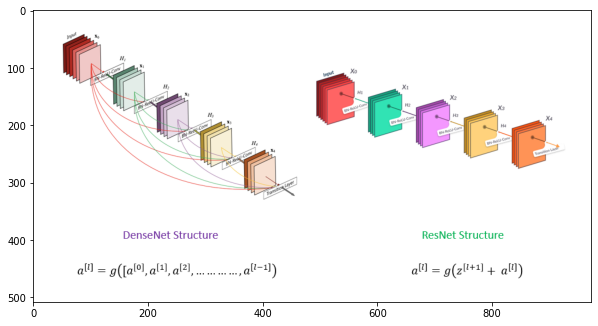

In [94]:
path="https://i.imgur.com/z3n0Afg.png"
description(path)

In [95]:
from tensorflow.keras.applications import DenseNet201
model_dense=DenseNet201(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )
model_dense.summary()

74850304/74836368 [==============================] - 1s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_6[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [97]:
new_model_dense=hybrid(model_dense)
hist,trained_model=model_fitting(model=new_model_dense,
              tuning=cp,
              train_data=data_train_augment,
              validation_data=data_val_augment,
              epochs=108,
              steps_per_epoch=10)
trained_model=r"/content/transfer_model.h5"
from keras.models import load_model
model=load_model(trained_model)
#prediction_resnet=model.predict(test_data_Transfer_learning)
denseResult=model.evaluate(test_data_Transfer_learning)
print(denseResult)
comparison["denseResult"]=denseResult

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_6[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

# Fused Deep Learning model
Resnet+Xception+DenseNet

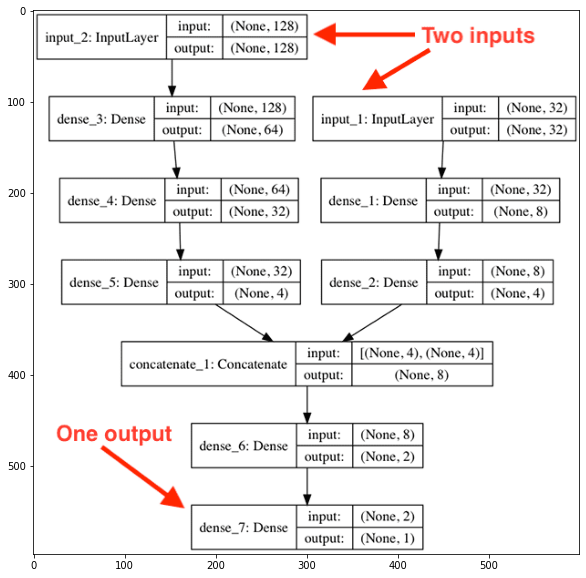

In [98]:
path="https://www.pyimagesearch.com/wp-content/uploads/2019/02/keras_multi_input_arch.png"
description(path)

In [99]:
# remove input layer from rst model and fuse others into sequence.
# making layers to untrainable
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet152
model_res=ResNet152(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )
from tensorflow.keras.applications import VGG19
model_vgg=VGG19(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )
import tensorflow as tf
from tensorflow.keras.applications import Xception
model_xcept=Xception(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )
from tensorflow.keras.applications import VGG19
model_vgg=VGG19(input_shape=(224,224,3),
               include_top=False, # avoid last prediction layers
               )

In [102]:
res_model=model_res
dense_model=model_dense
xcept_model=model_xcept


res_model=keras.Model(inputs=[res_model.layers[1].input],outputs=[res_model.layers[-80].output])  # stop taking feature extraction layers after last 50
for layers in res_model.layers:
  layers.trainable=False

dense_model=keras.Model(inputs=[dense_model.layers[1].input],outputs=dense_model.output) #  # start taking feature extraction layers after last 50
for layers in dense_model.layers:
  layers.trainable=True

xcept_model=keras.Model(inputs=[xcept_model.layers[5].input],outputs=[xcept_model.output])
for layers in xcept_model.layers:
  layers.trainable=True

vgg_model=model_vgg
for layers in vgg_model.layers:
  layers.trainable=True

res_model_new=GlobalAveragePooling2D()(res_model.output) # making keras tensors, aiming to do arithmatic these tensors
vgg_model_new=GlobalAveragePooling2D()(vgg_model.output)
xcept_model_new=GlobalAveragePooling2D()(xcept_model.output)
dense_model_new=GlobalAveragePooling2D()(dense_model.output)

In [103]:
from keras.layers import concatenate,Concatenate #Concatenate is used in a Sequential model, whereas concatenate is used in a Functional API.

In [104]:
x = concatenate([res_model_new,xcept_model_new]) # cocating layers

In [105]:
l1=Flatten()(x)
l1=Dense(1,activation="sigmoid")(l1)

fused_model=Model(inputs=[res_model.input,xcept_model.input],outputs=l1)
fused_model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [106]:
# second fused model with densenet at end followed by vgg 
x = concatenate([vgg_model_new,dense_model_new])
l1=Flatten()(x)
l1=Dense(1,activation="sigmoid")(l1)

fused_model2=Model(inputs=[vgg_model.input,dense_model.input],outputs=l1)
fused_model2.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_6[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

In [107]:
fused_model2.input

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_8')>,
 <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_6')>]

model.fit(
	x=[trainAttrX, trainImagesX], y=trainY,
	validation_data=([testAttrX, testImagesX], testY),
	epochs=200, batch_size=8)